# ***Properati: SPRING 2***

*¡¡¡ El objetivo de este notebook es mejorar el desempeño de algunos modelos avanzados de machine learning, aplicando transformaciones a las variables, enseñandole a la computador a aprender a mejorar los resultados a traves de los datos y con el tiempo ser mas inteligente !!!.*

Properati es una inmmobiliaria que permite a sus usuarios escoger una mejor casa mediante herramientas tecnologicas y datos relevantes. Ayuda a los comprados de una manera mas eficiente y brindando mejor servicio a los clientes potenciales. Una ventaja que tienen en su pagina web, es que se puede observar el interior del inmubele para facilitar el desplazamiento de una persona que vive en otro estado o en otro pais, y asi tomar deciciones conforme a sus comodidades.

### ***Estimacion precios de venta de Inmuebles***

A partir de las caracteristicas de inmuebles de venta se implementan modelos avanzados de Machine Learning que permitan estimar el precio de venta. La construccion de los modelos de aprendizaje se manejan de la siguiente manera: 
UN analisis ecploratorio del dataset, donde conocemos la distribucion de nuestras variables y algunos comportamientos. Seleccionamos los atributos mas importantes, y de esta manera entenderemos como manejar outliers e imputar los valores nulos. Se realizan trasnformaciones, entendiendo las diferencias de escalas de dimensionalidad entre variables, y asi posteriormente, puedan ser comparables; Ademas, el tipo de variable categorica que podemos encontrar. A partir de esto construimo el nuevo dataframe, determinamos nuestras variables independientes y dependiente(target), posteriormente realizar un train-test split. Finalemnte probamos diferentes modelos, optimizando sus hiperparametros, haciendo validacion y por ultimo obteninedo las metricas de evaluación.

### ***¿Que se logra con estos modelos?***

Algunos de los beneficios que podemos obtener es evitar perdida de tiempo en un inmueble que esta sobrevalorado, mejorar la imagen de la inmobiliaria y hacer negocios mas efectivos. Se pueden llevar acabo toma de mejores deciciones con resultados mas efectivos que crean una ventaja competitva, y asi implementar nuevas lineas de negocios o servicios que permitan una optimizacion operativa.
Un buen analisis dle mercado inmobiliario podemos conocer el tipo de propiedades que mas se venden en determinada ubicacion, y generar patrones de comportamiento para la estimacion de precios de inmuebles, con el fin de identificar tendencias y evolución en el sector de bienes raices.

### ***El desarrollo de este spring se lleva acabo de la siguiente manera:***

* Analisis exploratorio de los datos (Nueva variable temporal para el negocio)
  1. Algunos analisis de negocio que pueden ser utiles a la hora de vender- comprar un inmueble.
  2. mapa de localidades respecto a precio - superficie total. Como cambian dependiendo de la provincia

* Imputacion de datos nulos:
  1. Imputamos los datos nulos usando Miss Forest con la libreria missingpy: Se trabajara todo nuestro dataset usando este imputador, que para este caso se considero como el mas optimo para rellenar los datos faltantes, cumpliendo una coherencia valida dentro de nuestras variables, que pueden ser enteros o continuas.

* Algoritmo 1: Comparación Modelo Benchmark 
  1. Manejo de outliers
  2. standar Scaler 
  3. encoders
  4. Modelos: TreeRegressor, kNNRegressor y LinealRegressor
  5. metricas de comparacion
  6. Comparacion de modelo benchmark 

* Algoritmo 2 : Optimizando hiperparametros
  1. Modelo Random Forest (Robusto a outliers)
  2. Cross validation y Random Search
  2. metrica de evaluacicon r2

* Algoritmo 3: Atributos polinomicos
  1. Outliers
  2. Standar Scaler
  3. Atributos polinomicos llevados a una función lineal
  3. Modelo lineal y regularizacion ridge
  4. Metri de evaluacion r2

* Algortimo 4: Cambiando distriucion de variables independientes
  
  1. Transformacion de las varibales independientes en una distribucion gausseana.
  2. Nuevas variables predictoras.
  4. Outliers
  5. Standar Scaler
  6. Entrenamos un modelo de Random Forest
  7. Modelo lineal con atributo polinomico y regularizacion ridge

* Algoritmo 5: PCA, Usando nuevas variables predictoras, se determina si son importantes para los nuevos modelos avanzados.
  1. Nuevas variables predictoras.
  2. AdaboostRegressor y Random Search
  3. PCA - Varianza explicativa
  4. Random forest (PCA) - Random Search
  5. BaggingRegressor (PCA) - Grid Search

* Algoritmo 6: Clusterizacion
  1. Tratamiento de outliers
  2. Standar Scaler
  3. PCA - varianza explicativa
  4. Metodo de codo- KMeans
  5. Metodo silueta - KMeans
  6. KMeans- Componentes principales
  7. DBSCAN

* Conclusiones.

##***Librerias***

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import datetime
from datetime import date
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set()


# ***Cargamos Dataset***

In [55]:
from google.colab import drive

In [56]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spring 2/DS_Proyecto_02_Datos_Properati.csv')

In [58]:
data.shape

(146660, 19)

# ***Agregamos una nueva variable temporal para el analisis exploratorio de datos***

* Haciendo uso de datetime, convertimos las columnas de fechas, en informacion relevante que pueda ser interpretada por los modelos. 

* Nos basamos bajo un supuesto que rigue sobre todo el proyecto:
  1. La variable Superficie cubierta, no puede ser mayor a superficie total : Por esta razon, los datos que superen estos valores, seran reemplazados por los valores de superficie total, y asi evitar elminar estas filas.

In [59]:
data['start_date'] = pd.to_datetime(data['start_date'], errors= 'coerce')

In [60]:
data['end_date'] = pd.to_datetime(data['end_date'], errors='coerce')

In [61]:
data['tiempo_vendio (dias)'] = data['end_date'] - data['start_date']

In [62]:
data['tiempo_vendio (dias)'] = data['tiempo_vendio (dias)'].dt.days

*Como el valor de superficie cubierta no puede ser mayor a superficie total, realizamos un filtro para reemplazar las filas de superficie cubiera por el valor de superficie total.*

empezamos observando cuantos valores mayores a superficie total hay.

In [63]:
mayor = data.loc[data.surface_total < data.surface_covered]
mayor.shape

(1432, 20)

***Para obtener un valor parecido, usaremos el valor de superficie total para reemplazar los datos de superficie cubierta, ya que si usamos la media o la moda en este caso, abran valores que seguirian por encima de la superficie total.***

In [64]:
data.loc[data.surface_total < data.surface_covered, 'surface_covered'] = data.surface_total
data.shape

(146660, 20)

In [65]:
datacopy = data.copy() 

# ***Analisis Exploratorio de Datos (EDA)***

*Identificamos el typo de variables que tenemos*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   start_date            146660 non-null  datetime64[ns]
 1   end_date              121559 non-null  datetime64[ns]
 2   created_on            146660 non-null  object        
 3   lat                   136735 non-null  float64       
 4   lon                   136701 non-null  float64       
 5   l1                    146660 non-null  object        
 6   l2                    146660 non-null  object        
 7   l3                    146660 non-null  object        
 8   rooms                 146660 non-null  float64       
 9   bedrooms              146660 non-null  float64       
 10  bathrooms             140703 non-null  float64       
 11  surface_total         126133 non-null  float64       
 12  surface_covered       125046 non-null  float64       
 13 

Identificamos los valores Nulos

In [ ]:
data.isna().sum()

start_date                  0
end_date                25101
created_on                  0
lat                      9925
lon                      9959
l1                          0
l2                          0
l3                          0
rooms                       0
bedrooms                    0
bathrooms                5957
surface_total           20527
surface_covered         21614
price                       0
currency                    0
title                       0
description                 0
property_type               0
operation_type              0
tiempo_vendio (dias)    25101
dtype: int64

***Tabla estadistica (describe)***

In [ ]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias)
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05,121559.000000
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05,52.781769
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05,57.342288
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03,0.000000
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05,13.000000
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05,27.000000
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05,80.000000
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07,434.000000


*En esta tabla podemos identificar el rango intercuartilico, la media, la desviacion estandar, el maximo y el minimo de nuestros features.*

--------------------------------------------------------------------------------

***Matriz de correlacion***

In [ ]:
corr = data.corr()

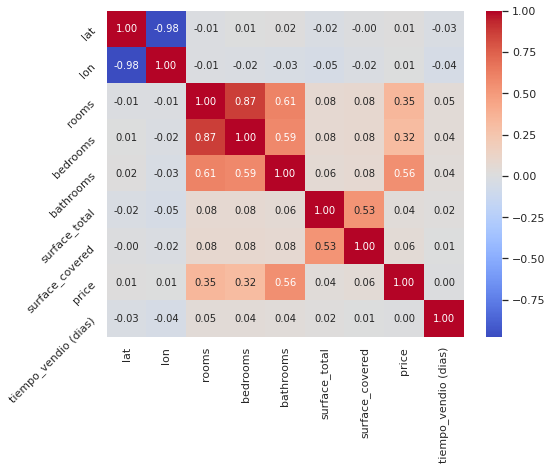

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

Se puede identificar que las variables mas correlacionadas son: 
1. bathrooms - rooms
2. bedrooms - rooms
3. lat - lon
4. price - bathrooms 

--------------------------------------------------------------------------------

* *Seleccionamos las variables numericas para revisar outliers, estadisticos y hacer analisis exploratorio*

In [ ]:
colum = [ 'lat','lon','rooms','bedrooms',	'bathrooms', 'surface_total','surface_covered','price','tiempo_vendio (dias)']
Data = data[colum]

Identificamos variables duplicadas, que no son necesarias para nuestro analisis, las cuales seran tratadas posteriormente.

In [ ]:
Data[Data.duplicated(keep='first')]

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias)
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,15.0
6,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,14.0
7,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,14.0
8,-34.639598,-58.419612,1.0,1.0,1.0,45.0,37.0,89000.0,67.0
9,-34.639598,-58.419612,1.0,1.0,1.0,45.0,37.0,89000.0,67.0
...,...,...,...,...,...,...,...,...,...
146558,NaN,NaN,4.0,3.0,5.0,220.0,210.0,1470000.0,170.0
146568,NaN,NaN,2.0,1.0,2.0,57.0,46.0,120000.0,14.0
146571,NaN,NaN,2.0,1.0,2.0,57.0,46.0,120000.0,14.0
146577,NaN,NaN,3.0,2.0,2.0,89.0,71.0,167000.0,14.0


Observamos el numero mayor y menor de cada columna


In [ ]:
for i in Data.columns:
    print(f'{i}:')
    print(f'Valor mínimo: {data[i].min()}')
    print(f'Valor máximo: {data[i].max()}\n')

lat:
Valor mínimo: -35.318457
Valor máximo: 85.0511287798

lon:
Valor mínimo: -180.0
Valor máximo: -57.805831895299995

rooms:
Valor mínimo: 1.0
Valor máximo: 35.0

bedrooms:
Valor mínimo: 0.0
Valor máximo: 15.0

bathrooms:
Valor mínimo: 1.0
Valor máximo: 14.0

surface_total:
Valor mínimo: 10.0
Valor máximo: 193549.0

surface_covered:
Valor mínimo: 1.0
Valor máximo: 126062.0

price:
Valor mínimo: 5500.0
Valor máximo: 32434232.0

tiempo_vendio (dias):
Valor mínimo: 0.0
Valor máximo: 434.0



*Observamos la correlacion que existe entre las variables y el target.*

In [ ]:
Data.corr()['price'][:]

lat                     0.013606
lon                     0.008871
rooms                   0.351090
bedrooms                0.315572
bathrooms               0.555334
surface_total           0.038784
surface_covered         0.057948
price                   1.000000
tiempo_vendio (dias)    0.003716
Name: price, dtype: float64

Se puede observar en la tabla anterior, que las variables mas correlacionada con precio son bathrooms, bedrooms y rooms

--------------------------------------------------------------------------------

*Graficamos un boxplot para analizar outliers*

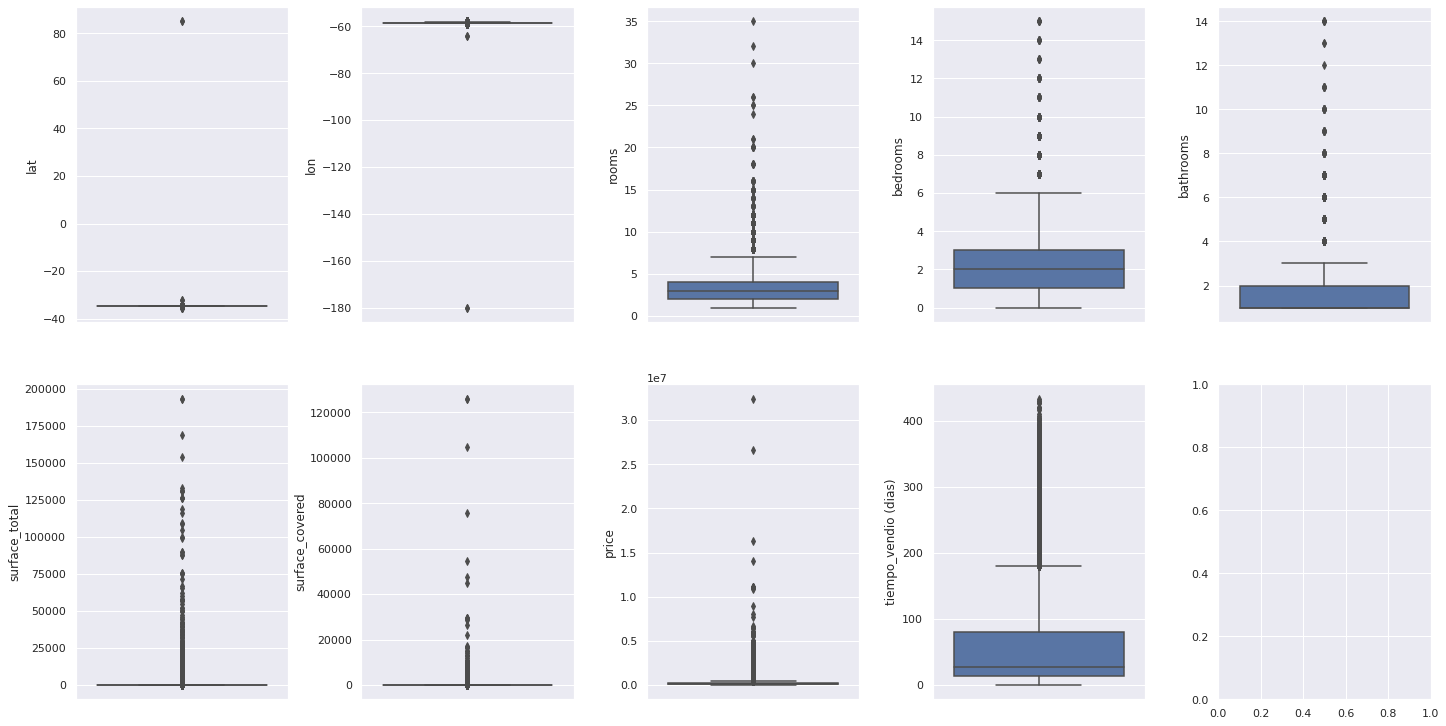

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Data.items():
    sns.boxplot(y=k, data=Data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

*Outliers en la variable lon y lan son muy notorios, por lo tando vamos a eliminarlos y trabajaremos con todos los modelos bajo este supuesto. Estos valores de outliers no corresponden a gran buenos aires, por tal razon es necesario eliminar estos datos.*

--------------------------------------------------------------------------------

*Encontramos el porcentaje outliers de datos nulos de cada columna, usando el rango intercuartilico*

In [ ]:
    for k, v in Data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(Data)[0]
        print("Columna %s outliers = %.2f%%" % (k, perc))

Columna lat outliers = 18.95%
Columna lon outliers = 11.71%
Columna rooms outliers = 2.26%
Columna bedrooms outliers = 0.83%
Columna bathrooms outliers = 3.81%
Columna surface_total outliers = 9.27%
Columna surface_covered outliers = 6.84%
Columna price outliers = 7.50%
Columna tiempo_vendio (dias) outliers = 2.71%


-----------------------------------------------------------------------------

Vamos a eliminar los valores de latitud por encima de -34, y asi quitar valores que no corresponden.

In [ ]:
Data = Data.loc[Data['lat'] < -34] 

In [ ]:
Data.shape

(134726, 9)

Graficamos nuevamente para observar como se comportan ahora nuestras variables.

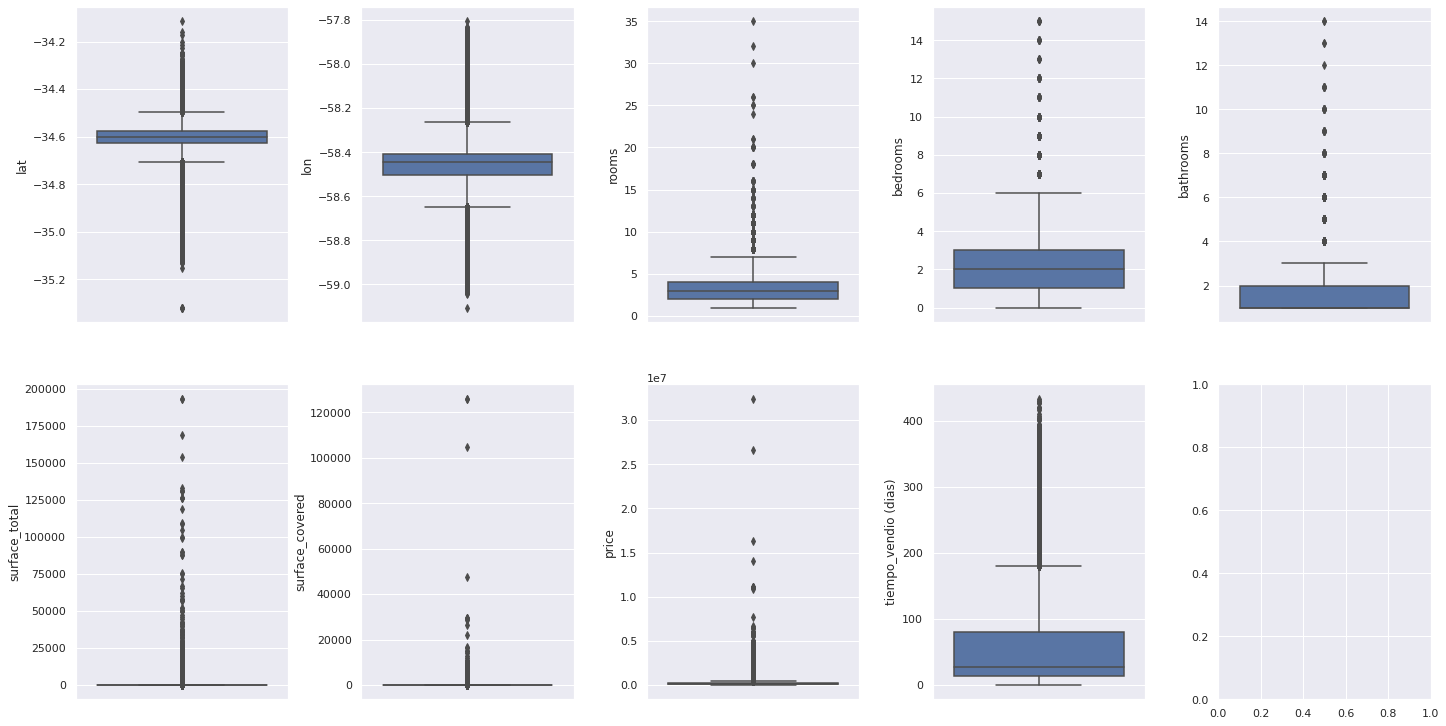

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Data.items():
    sns.boxplot(y=k, data=Data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#***Algunos Nuevos Analisis***

* Vamos a realizar algunos analisis de negocio que pueden servir a la hora de tomar deciciones a un comprador o vendedor de un inmueble.

In [ ]:
#frecuencias
frecuencia = data.price.sum()
#suma total de tiempo de venta en dias
frecuenciaa = data['tiempo_vendio (dias)'].sum()

#Depa  = seleccionamos el tipo de propiedad
#Depa 1 = sumamos todos los precios de cada tipo de propiedad
#Depa 2 = obtenemos la frecuencia de la suma total de precios de cada tipo de propiedad
#Depa 4 = cuenta la cantidad de tipo de propiedades
#Depa 5 = obtengo el promedio de la variable precio para cada tipo de propiedad

Depa = data.loc[data.property_type == 'Departamento']
Depa2 = Depa.price.sum()
Depa3 = (Depa2/frecuencia)*100
Depa4 = Depa['property_type'].count()
Depa5 =  data.loc[data.property_type == 'Departamento'].price.mean()
Depa22 = Depa['tiempo_vendio (dias)'].mean()

PH = data.loc[data.property_type == 'PH']
PH2 = PH.price.sum()
PH3 = (PH2/frecuencia)*100
PH4 = PH['property_type'].count()
PH5 =  data.loc[data.property_type == 'PH'].price.mean()
PH22 = PH['tiempo_vendio (dias)'].mean()

Casa = data.loc[data.property_type == 'Casa']
Casa2 = Casa.price.sum()
Casa3 = (Casa2/frecuencia)*100
Casa4 = Casa['property_type'].count()
Casa5 =  data.loc[data.property_type == 'Casa'].price.mean()
Casa22 = Casa['tiempo_vendio (dias)'].mean()


Lote = data.loc[data.property_type == 'Lote']
Lote2 = Lote.price.sum()
Lote3 = (Lote2/frecuencia)*100
Lote4 = Lote['property_type'].count()
Lote5 =  data.loc[data.property_type == 'Lote'].price.mean()
Lote22 = Lote['tiempo_vendio (dias)'].mean()

Casa_campo = data.loc[data.property_type == 'Casa de campo']
Casa_campo2 = Casa_campo.price.sum()
Casa_campo3 = (Casa_campo2/frecuencia)*100
Casa_campo4 = Casa_campo['property_type'].count()
Casa_campo5 =  data.loc[data.property_type == 'Casa de campo'].price.mean()
Casa_campo22 = Casa_campo['tiempo_vendio (dias)'].mean()

oficina = data.loc[data.property_type == 'Oficina']
oficina2 = oficina.price.sum()
oficina3 = (oficina2/frecuencia)*100
oficina4 = oficina['property_type'].count()
oficina5 =  data.loc[data.property_type == 'Oficina'].price.mean()
oficina22 = oficina['tiempo_vendio (dias)'].mean()

otro = data.loc[data.property_type == 'Otro']
otro2 = otro.price.sum()
otro3 = (otro2/frecuencia)*100
otro4 = otro['property_type'].count()
otro5 =  data.loc[data.property_type == 'Otro'].price.mean()
otro22 = otro['tiempo_vendio (dias)'].mean()

local = data.loc[data.property_type == 'Local comercial']
local2 = local.price.sum()
local3 = (local2/frecuencia)*100
local4 = local['property_type'].count()
local5 =  data.loc[data.property_type == 'Local comercial'].price.mean()
local22 = local['tiempo_vendio (dias)'].mean()

cochera = data.loc[data.property_type == 'Cochera']
cochera2 = cochera.price.sum()
cochera3 = (cochera2/frecuencia)*100
cochera4 = cochera['property_type'].count()
cochera5 =  data.loc[data.property_type == 'Cochera'].price.mean()
cochera22 = cochera['tiempo_vendio (dias)'].mean()

deposito = data.loc[data.property_type == 'Depósito']
deposito2 = deposito.price.sum()
deposito3 = (deposito2/frecuencia)*100
deposito4 = deposito['property_type'].count()
deposito5 =  data.loc[data.property_type == 'Depósito'].price.mean()
deposito22 = deposito['tiempo_vendio (dias)'].mean()

*Creamos un dataset para guardar nuestras nuevas variables*

In [ ]:
propiedades = ['Departamento',
 'PH',
 'Casa',
 'Lote',
 'Casa de campo',
 'Oficina',
 'Otro',
 'Local comercial',
 'Cochera',
 'Depósito']
Propiedades = pd.DataFrame(propiedades)
Propiedades.rename(columns = {0:'propiedades'}, inplace = True)

Creamos la columna para cada variable y la guardamos en el dataframe de "propiedades"

In [ ]:
Propiedades.loc[Propiedades.propiedades == 'Departamento', 'suma total de precio'] = Depa2
Propiedades.loc[Propiedades.propiedades == 'Departamento', 'frecuencia2'] = Depa3
Propiedades.loc[Propiedades.propiedades == 'Departamento', 'count'] = Depa4 
Propiedades.loc[Propiedades.propiedades == 'Departamento', 'mean'] = Depa5
Propiedades.loc[Propiedades.propiedades == 'Departamento', 'promedio de venta'] = Depa22

Propiedades.loc[Propiedades.propiedades == 'PH', 'suma total de precio'] = PH2
Propiedades.loc[Propiedades.propiedades == 'PH', 'frecuencia2'] = PH3
Propiedades.loc[Propiedades.propiedades == 'PH', 'count'] = PH4
Propiedades.loc[Propiedades.propiedades == 'PH', 'mean'] = PH5
Propiedades.loc[Propiedades.propiedades == 'PH', 'promedio de venta'] = PH22

Propiedades.loc[Propiedades.propiedades == 'Casa', 'suma total de precio'] = Casa2
Propiedades.loc[Propiedades.propiedades == 'Casa', 'frecuencia2'] = Casa3
Propiedades.loc[Propiedades.propiedades == 'Casa', 'count'] = Casa4
Propiedades.loc[Propiedades.propiedades == 'Casa', 'mean'] = Casa5
Propiedades.loc[Propiedades.propiedades == 'Casa', 'promedio de venta'] = Casa22

Propiedades.loc[Propiedades.propiedades == 'Lote', 'suma total de precio'] = Lote2
Propiedades.loc[Propiedades.propiedades == 'Lote', 'frecuencia2'] = Lote3
Propiedades.loc[Propiedades.propiedades == 'Lote', 'count'] = Lote4
Propiedades.loc[Propiedades.propiedades == 'Lote', 'mean'] = Lote5
Propiedades.loc[Propiedades.propiedades == 'Lote', 'promedio de venta'] = Lote22

Propiedades.loc[Propiedades.propiedades == 'Casa de campo', 'suma total de precio'] = Casa_campo2
Propiedades.loc[Propiedades.propiedades == 'Casa de campo', 'frecuencia2'] = Casa_campo3
Propiedades.loc[Propiedades.propiedades == 'Casa de campo', 'count'] = Casa_campo4
Propiedades.loc[Propiedades.propiedades == 'Casa de campo', 'mean'] = Casa_campo5
Propiedades.loc[Propiedades.propiedades == 'Casa de campo', 'promedio de venta'] = Casa_campo22

Propiedades.loc[Propiedades.propiedades == 'Oficina', 'suma total de precio'] = oficina2
Propiedades.loc[Propiedades.propiedades == 'Oficina', 'frecuencia2'] = oficina3
Propiedades.loc[Propiedades.propiedades == 'Oficina', 'count'] = oficina4
Propiedades.loc[Propiedades.propiedades == 'Oficina', 'mean'] = oficina5
Propiedades.loc[Propiedades.propiedades == 'Oficina', 'promedio de venta'] = oficina22

Propiedades.loc[Propiedades.propiedades == 'Otro', 'suma total de precio'] = otro2
Propiedades.loc[Propiedades.propiedades == 'Otro', 'frecuencia2'] = otro3
Propiedades.loc[Propiedades.propiedades == 'Otro', 'count'] = otro4
Propiedades.loc[Propiedades.propiedades == 'Otro', 'mean'] = otro5
Propiedades.loc[Propiedades.propiedades == 'Otro', 'promedio de venta'] = otro22

Propiedades.loc[Propiedades.propiedades == 'Local comercial', 'suma total de precio'] = local2
Propiedades.loc[Propiedades.propiedades == 'Local comercial', 'frecuencia2'] = local3
Propiedades.loc[Propiedades.propiedades == 'Local comercial', 'count'] = local4
Propiedades.loc[Propiedades.propiedades == 'Local comercial', 'mean'] = local5
Propiedades.loc[Propiedades.propiedades == 'Local comercial', 'promedio de venta'] = local22

Propiedades.loc[Propiedades.propiedades == 'Cochera', 'suma total de precio'] = cochera2
Propiedades.loc[Propiedades.propiedades == 'Cochera', 'frecuencia2'] = cochera3
Propiedades.loc[Propiedades.propiedades == 'Cochera', 'count'] = cochera4
Propiedades.loc[Propiedades.propiedades == 'Cochera', 'mean'] = cochera5
Propiedades.loc[Propiedades.propiedades == 'Cochera', 'promedio de venta'] = cochera22

Propiedades.loc[Propiedades.propiedades == 'Depósito', 'suma total de precio'] = deposito2
Propiedades.loc[Propiedades.propiedades == 'Depósito', 'frecuencia2'] = deposito3
Propiedades.loc[Propiedades.propiedades == 'Depósito', 'count'] = deposito4
Propiedades.loc[Propiedades.propiedades == 'Depósito', 'mean'] = deposito5
Propiedades.loc[Propiedades.propiedades == 'Depósito', 'promedio de venta'] = deposito22

In [ ]:
Propiedades.sort_values(by = 'suma total de precio',ascending=False)

,propiedades,suma total de precio,frecuencia2,count,mean,promedio de venta
0,Departamento,2.484527e+10,71.532759,105276.0,236001.282391,50.258760
2,Casa,5.917563e+09,17.037432,21443.0,275967.132911,71.762528
1,PH,2.642180e+09,7.607178,14103.0,187348.761895,50.563557
3,Lote,5.063414e+08,1.457823,1308.0,387111.197248,72.410615
6,Otro,2.512108e+08,0.723269,374.0,671686.697861,64.386243
9,Depósito,2.347720e+08,0.675939,265.0,885932.075472,21.636364
7,Local comercial,1.459848e+08,0.420309,325.0,449184.064615,53.261905
5,Oficina,1.165099e+08,0.335447,635.0,183480.108661,59.606796
4,Casa de campo,6.660219e+07,0.191756,314.0,212108.885350,75.610442
8,Cochera,6.282300e+06,0.018088,259.0,24255.984556,22.578947


--------------------------------------------------------------------------------

**Obtenemos grafico de barras para la suma total y su respectivo diagrama de pastel**

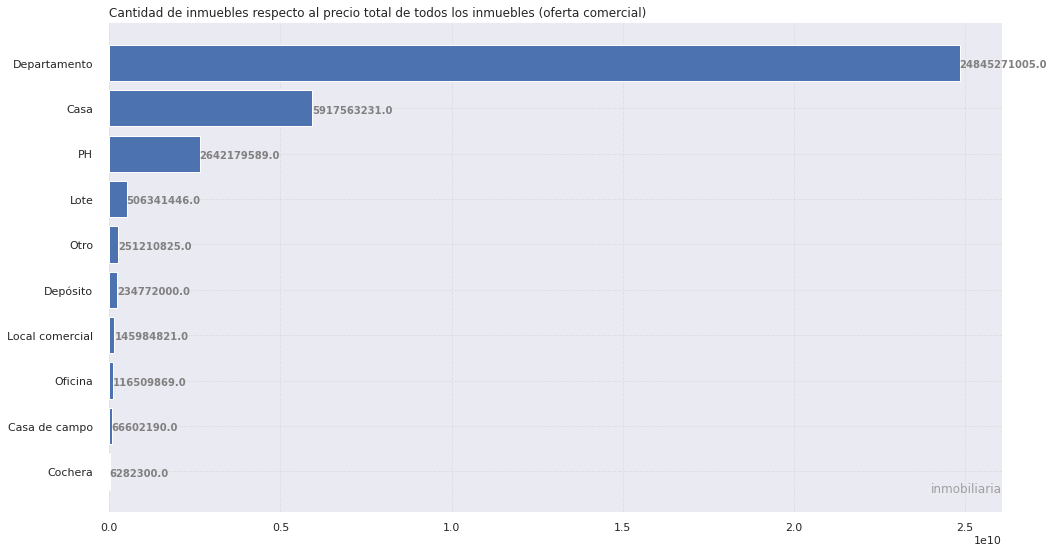

In [ ]:
name = Propiedades['propiedades'].head(10)
price = Propiedades['suma total de precio'].head(10)

#ordenamos los valores de mayor a menor
price,name = zip(*sorted(zip(price,name), reverse=True))

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))


 
# Horizontal Bar Plot
ax.barh(name, price)

 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cantidad de inmuebles respecto al precio total de todos los inmuebles (oferta comercial)',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'inmobiliaria', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)


# Show Plot
plt.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=Propiedades['propiedades'], values=Propiedades['frecuencia2'], hole =.3                         
                             )])

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

fig.show()


*Se puede concluir que la mayor cantidad de venta en toda gran buenos aires son departamentos, seguido de casas y PH. Esto puede ser util a un empresario que quiera invertir en bienes raices para tomar mejores deciciones, y tomarse el tiempo de analizar lo que realmente se esta vendiendo en una ubicacion en especifico, y asi no perder su capital.*

--------------------------------------------------------------------------------

**Ordenamos de mayor a menos respecto a promedio en ventas para realizar el grafico de barras y el diagrama de pastel**

In [ ]:
Propiedadess = Propiedades.sort_values(by = 'promedio de venta',ascending=False)

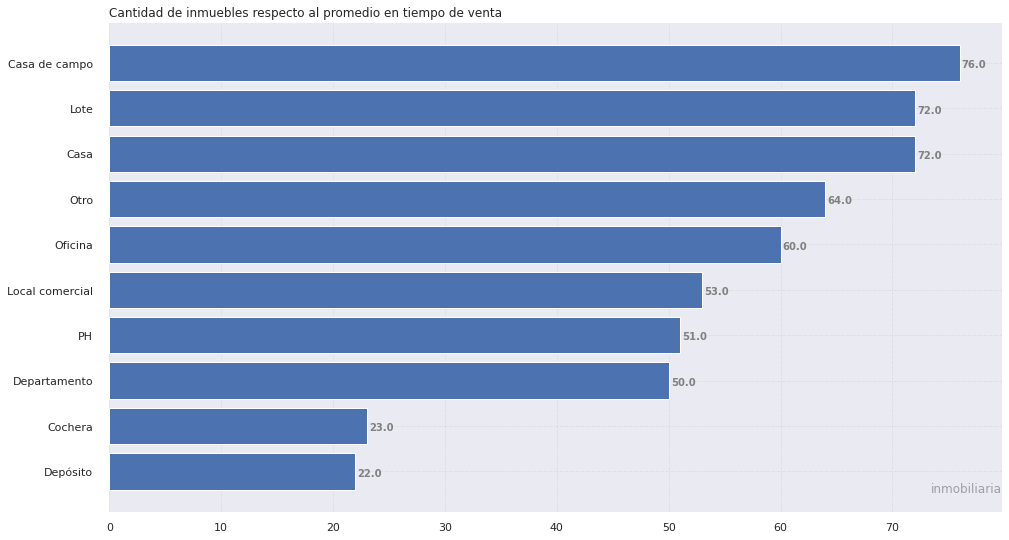

In [ ]:
name3 = Propiedadess['propiedades'].head(10)
prom = round(Propiedadess['promedio de venta']).head(10)

#ordenamos los valores de mayor a menor
#prom,name3 = zip(*sorted(zip(prom,name), reverse=True))

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name3, prom)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Cantidad de inmuebles respecto al promedio en tiempo de venta',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'inmobiliaria', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [ ]:
fig = go.Figure(data=[go.Pie(labels=Propiedadess['propiedades'], values=round(Propiedadess['promedio de venta']), hole =.3                         
                             )])

fig.update_traces(textposition='inside', textinfo='value+label')
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))

fig.show()

*Podemos observar mas detalladamente cuanto es el promedio de tiempo de venta para cada inmueble.*

*Este tipo de graficos son muy utiles para identificar las propiedades que se venden mas rapido o mas lento para asi determinar una estrategia de venta y seleccionar compradores potenciales.*

--------------------------------------------------------------------------------

# ***Mapas de localidades***

* Cargamos nuevamente el dataset para realizar este analisis de mapas

In [ ]:
mapa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spring 2/DS_Proyecto_02_Datos_Properati.csv')

Dropeamos los datos nulos de longitud y latitud, que para este caso son las variables que nos interesa anaizar,ademas de price, property type y superficie total(Que no cuentan con valores Nan).

In [ ]:
mapa.dropna(subset = ["lon"], inplace=True)
mapa.dropna(subset = ["lat"], inplace=True)
mapa.isna().sum()

start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5366
surface_total      19122
surface_covered    20142
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Creamos una funcion que elimina outliers usando el rango intercuartilico.

In [88]:
def valores_iqr(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def texto_iqr(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = valores_iqr(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = valores_iqr(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = valores_iqr(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

In [ ]:
mp = remove_outliers(mapa, 'lon')
mp = remove_outliers(mapa,'lat')
mp = remove_outliers(mapa, 'price')
mp= mp[(mp['surface_total'] >= 15) & (mp['surface_total'] <= 2000)]
mp1 = mp[(mp.price <= 400000)]

## ***Instalamos libreria colorspacious***

Observamos como se distribuye el precio en toda la zona de gran buenos aires, respecto a la superficie total.

In [ ]:
pip install colorspacious

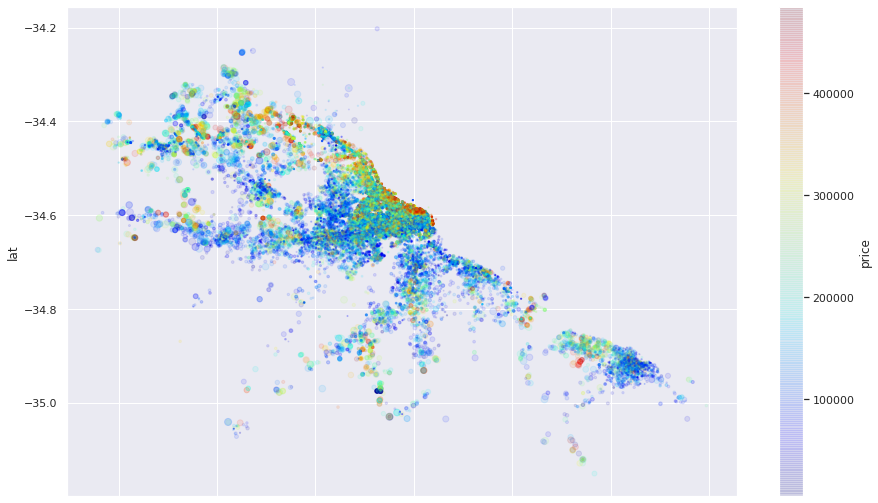

In [ ]:
mp.plot(kind='scatter', x = 'lon', y = 'lat', figsize = (15,9), alpha = 0.1, s = mp['surface_total']/40, c = 'price', colorbar = True, cmap= plt.get_cmap('jet'))

El grafico muestra el tamaño de superficie total que esta representada por el tamaño del circulo (entre mas grande el circulo mayor area - entre mas pequeño el circulo menor area) respecto al precio que esta representado por un mapa de calor (Entre mas rojo sea mas caro, entre mas azul sea menos caro).

1. Podemos concluir que los inmuebles mas costosos se encuentran dentro de capital federal o los que estan mas cerca del mar. Mientras que en los alrededores se encuentran los inmuebles menos costosos y con mayor superficie total.

--------------------------------------------------------------------------------

## ***Vamos a usar la libreria folium***

In [ ]:
pip install folium

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

En este punto vamos hacer un poco creativos. Creamos dos variables (type: str) que sean la suma de tipo de propiedad y precio, para obtener una nueva columna (pre_Prop),con el fin de generar una nueva columna que me indique el valor del inmueble y el tipo de inmueble, para posteriormente realizar el market en el mapa de calor.

***Es mas facil entenderlo observando la imagen***

In [ ]:
mp1['precio2']= mp1.price.astype(str)
mp1['depa'] = mp1.property_type.astype(str)
mp1['pre_Prop'] = mp1.depa + mp1.precio2
mp1.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

(104385, 22)

* *Creamos la base del mapa, usando los parametros correspondientes* 

In [ ]:
baseMap = folium.Map(
    width = "100%",
    height = "100%",
    location = [-34.61315, -58.37723],
    zoom_start = 10

)

Como tenemos muchos datos, vamos a escoger solo 500 al azar para cargar el mapa y que no sea tan pesado al correrlo, y se pueda analizar facilmente.

In [ ]:
mp1 = mp1.sample(500, replace=True)

generamos las coordenadas para el mapa de calor unicamente, con los mismos 500 datos.

In [ ]:
coordenadas = mp1[['lat', 'lon']].values
coordenadas.shape

(500, 2)

***Creamos los Markers donde se localizan los diferentes tipos de propiedades, con su respectivo precio.***

Esto le permitiria al usuario identificar los diferentes tipos de inmuebles, ubicados en las diferentes provincias, y analizar su precio vs localizacion de una manera rapida y didactica.

In [ ]:
# add marker one by one on the map
for i in range(0,len(mp1)):
  basemark = folium.Marker(
      location=[mp1.iloc[i]['lat'], mp1.iloc[i]['lon']],
      popup=mp1.iloc[i]['pre_Prop'],
   ).add_to(baseMap)

baseMap = baseMap.add_child(plugins.HeatMap(coordenadas)) 
baseMap

Advertencia: El folium tiene un problema en general que no se ah podido solucionar. El weight (en este caso se usaria con la variable precio, para que el color este en funcion de ello), tiene un error o un bug. Por esta razon, se decidio juntar las dos variables de tipo de propiedad y precio.

# ***Transformaciones***
Los Algoritmos van a estar basados bajo estas transformaciones y las hipotesis anteriores, con algunas diferencias que se trataran por requerimiento en algunos modelos, o donde sea necesario.

* Vamos a realizar diferentes transformaciones: 
  1. Trabajar con variables categoricas (Encoders)
  2. Eliminacion de duplicados
  3. Trabajamos con datos faltantes (MissForest)

### ***instalamos la libreria missing values handler***

In [ ]:
pip install missingpy

     |████████████████████████████████| 51kB 2.5MB/s 


## ***data1***

*Cargamos el datset*

In [66]:
data1 = data.copy()

Observamos los tipos de variables que tenemos en nuestro dataset

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   start_date            146660 non-null  datetime64[ns]
 1   end_date              121559 non-null  datetime64[ns]
 2   created_on            146660 non-null  object        
 3   lat                   136735 non-null  float64       
 4   lon                   136701 non-null  float64       
 5   l1                    146660 non-null  object        
 6   l2                    146660 non-null  object        
 7   l3                    146660 non-null  object        
 8   rooms                 146660 non-null  float64       
 9   bedrooms              146660 non-null  float64       
 10  bathrooms             140703 non-null  float64       
 11  surface_total         126133 non-null  float64       
 12  surface_covered       125046 non-null  float64       
 13 

En este caso se presentan 3 tipos de variables diferentes:
1. datetime64
2. float64
3. object

--------------------------------------------------------------------------------

## ***Encoder***

Es importante identificar el tipo de variable categorica que tenemos en nuestro dataset. Existen las variables categoricas ordinales y nominales.

Variable ordinal : Podemos hacer una asignacion a numeros enteros manteniendo un orden, por ejemplo: tamaño de ropa,rangos etarios, recordando que no se pueden sumar.

Variable nominal : Las categorias no siguen una relacion de orden y niguna puede ser mayor que otra, por ejemplo: la nacionalidad, genero.

*El feature property_type puede llegar a ser importante dentro de los modelos, por lo tanto trabajaremos con esta columna, usando One Hot Encoder (variables nominales)*

* Encodeamos la variable categorica de interes.
1. Property_type 

(*Nota: De acuerdo a unos analisis e implementacion modelos que se hicieron anteriormente, nos dimos cuenta de que la varibale l2, no aportaba ningun peso, por lo que se decidio dejarla fuera de los algoritmos*)

***Creamos una funcion para calcular cualquier ONE HOT ENCODER***

In [68]:
def createOHE(df, colname):


  enc = OneHotEncoder(handle_unknown='ignore')


  enc.fit(df[[colname]])

  enc.categories_[0]

  enc.transform(df[[colname]]).toarray()

  embarked_transformed = enc.transform(df[[colname]]).toarray()

  pd.DataFrame(embarked_transformed, columns=enc.categories_[0])

  df.reset_index(drop=True, inplace=True)

  #df = pd.merge(df, embarked_transformed, left_index=True, right_index=True)

  df = df.join(pd.DataFrame(embarked_transformed, columns=enc.categories_[0]))

  df.drop([colname],axis=1, inplace = True)

  return df

Vamos a reasignar las variables de tipo de propiedad, y todo lo que no sea Departamento, casa o PH, lo categorizamos como otros. Con el fin de no aumentar demasiado la dimensionalidad de nuestro dataset, y el analisis pueda tener mejor interpretacion.

*Recordemos que las 3 variables mas importantes son Departamento, casa y PH, los cuales representan en su gran mayoria el dataset, mientras que los demas tipos de propiedades representan un porcentaje muy bajo.*

In [69]:
prop = ['Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera' ,'Depósito']

In [70]:
data1.loc[data1['property_type'].isin(prop), 'property_type'] = 'otro'

### ***ONE HOT ENCODER***

Encodeamos la variable property_type con la funcion definida anteriormente. 
* Esta funcion me añade las nuevas columnas a mi dataset.

In [71]:
data1 = createOHE(data1, 'property_type')

In [72]:
data1.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,operation_type,tiempo_vendio (dias),Casa,Departamento,PH,otro
0,2019-10-17,2019-12-23,2019-10-17,-34.60588,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta,67.0,0.0,1.0,0.0,0.0


## ***Duplicados***

Los duplicados son un problema habitual en el conjunto de datos. Pueden ser del registro completo de datos o salamente por elementos. Eliminar estos registros es indispensable para evitar errores en los modelos posteriores.



***Definimos las variables numericas para analizar duplicados e imputar datos nulos***

In [73]:
independiente_variable = data1.drop(data1.columns[[0,1,2,5,6,7,14,15,16,17]], axis = 1)

***Vamos a determinar si hay filas duplicadas en nuestro dataset***

In [74]:
independiente_variable[independiente_variable.duplicated(keep='first')]

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias),Casa,Departamento,PH,otro
7,-34.600988,-58.433061,2.0,1.0,1.0,70.0,70.0,159500.0,14.0,0.0,0.0,1.0,0.0
9,-34.639598,-58.419612,1.0,1.0,1.0,45.0,37.0,89000.0,67.0,0.0,0.0,1.0,0.0
40,-34.597613,-58.416688,2.0,1.0,1.0,49.0,41.0,169000.0,5.0,0.0,1.0,0.0,0.0
44,-34.576254,-58.438893,2.0,1.0,1.0,50.0,47.0,142000.0,14.0,0.0,1.0,0.0,0.0
48,-34.597613,-58.416688,2.0,1.0,1.0,49.0,41.0,169000.0,10.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146517,-34.578714,-58.431938,3.0,2.0,1.0,72.0,65.0,165000.0,13.0,0.0,1.0,0.0,0.0
146546,NaN,NaN,3.0,2.0,2.0,89.0,82.0,434999.0,170.0,0.0,1.0,0.0,0.0
146558,NaN,NaN,4.0,3.0,5.0,220.0,210.0,1470000.0,170.0,0.0,1.0,0.0,0.0
146571,NaN,NaN,2.0,1.0,2.0,57.0,46.0,120000.0,14.0,0.0,1.0,0.0,0.0


***Eliminamos los duplicados***

In [75]:
independiente_variable = independiente_variable.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=False, 
                          ignore_index=True)


In [76]:
independiente_variable

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias),Casa,Departamento,PH,otro
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,67.0,0.0,1.0,0.0,0.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,35.0,0.0,0.0,1.0,0.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,15.0,0.0,0.0,1.0,0.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,67.0,0.0,0.0,1.0,0.0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,146.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,13.0,0.0,1.0,0.0,0.0
131068,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,14.0,0.0,1.0,0.0,0.0
131069,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,14.0,0.0,1.0,0.0,0.0
131070,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,14.0,0.0,1.0,0.0,0.0


*Se identificaron registros duplicados parciales, donde se encontraron mismos registros guardados con diferentes identificadores.*
Esto puede llevar a pensar varias hipotesis que deben ser tratadas con cuidado:
1. hipotesis 1: Los registros no sean duplicados intencionalmente, por lo contrario, puede que pertenescan a un mismo tipo de propiedad, por ejemplo:departamento, con las mismas caracteristicas pero un piso diferente. 
2. hipotesis 2: Los registros son iguales, pero con fechas diferentes, haciendo referencia a la fecha en que se publico y se vendio y posteriormente se volvio a vender, y no se elimino el registro.

Para nuestro caso vamos a trabajar sobre el supuesto de que solamente son duplicados parciales.

## ***MissForest***

MissForest es un algoritmo de imputacion de datos basado en aprendizaje automatico que funciona con el algoritmo de Random Forest. Donde cada iteracion mejora cada vez los datos.
En un estudio se comprobó que MissForest supero a todos los demas algoritmos en todas las metricas, incluyendo KNN-Imputer.

MissForest se puede aplicar a tipos de datos mixtos, numericos y categoricos, ademas, de no hacer supocisiones de relaciones de caracteristicas como lo hace KNN. Es robusto a datos ruidosos y multicolinealidad (evaluando la entropia y la informacion de ganancia.)

Random forest es no parametrico, por lo que no requiere ser tuniado, y puede trabajar con una alta dimensionalidad de datos, y no es propenso a la maldicion de la dimensionalidad.

Imputacion de datos :
1. cargamos la libreria
2. imputacion de valores nulos
3. Guardamos datos imputados (tiempo de espera fue un poco largo)
4. Se descargan los datos imputados
5. Se cargan nuevamente los datos imputados 

*Si no se hace de esta manera la siguiente celda no correra, habria que cambiar el nombre de las columnas de data2 (ejemplo : independiente_variable['lat'] = data2[0].....etc.), para volver el dataset que se venia trabajando.*

*Cargamos la libreria misssingpy*

In [ ]:
from missingpy import MissForest


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   start_date            146660 non-null  datetime64[ns]
 1   end_date              121559 non-null  datetime64[ns]
 2   created_on            146660 non-null  object        
 3   lat                   136735 non-null  float64       
 4   lon                   136701 non-null  float64       
 5   l1                    146660 non-null  object        
 6   l2                    146660 non-null  object        
 7   l3                    146660 non-null  object        
 8   rooms                 146660 non-null  float64       
 9   bedrooms              146660 non-null  float64       
 10  bathrooms             140703 non-null  float64       
 11  surface_total         126133 non-null  float64       
 12  surface_covered       125046 non-null  float64       
 13 

In [ ]:
imputer = MissForest()

data2_imputed = imputer.fit_transform(independiente_variable)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [ ]:
data2 = pd.DataFrame(data2_imputed)

## ***Guardamos los datos imputados***

In [ ]:
from google.colab import files


data2.to_csv('imputermissforest1.csv',index = False, header=True)
save_file = pd.read_csv('imputermissforest1.csv')
save_file
files.download('imputermissforest1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***Cargamos los datos imputados***

In [77]:
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spring 2/datas spring 2/camilo andres pulzara mora spring 2/imputermissforestconduplicados.csv')

## ***Despues de guardar los datos y cargarlos nuevamente seguimos trabajando (data2)***

*reemplazamos los valores nulos de (independiente variable) con los datos imputados (data2)*

In [78]:
independiente_variable['lat'] = data2['0']
independiente_variable['lon'] = data2['1']
independiente_variable['bathrooms'] = data2['4']
independiente_variable['surface_total'] = data2['5']
independiente_variable['surface_covered'] = data2['6'] 
independiente_variable['tiempo_vendio (dias)'] = data2['8'] 

In [79]:
independiente_variable.isna().sum()

lat                     0
lon                     0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
price                   0
tiempo_vendio (dias)    0
Casa                    0
Departamento            0
PH                      0
otro                    0
dtype: int64

***confirmamos que no hay valores nulos***

--------------------------------------------------------------------------------

# ***Algoritmo 1***

En este primera etapa vamos a retomar el modelo benchmar para asi compararlo con nuestro nuevo modelo.


1. Trabajaremos los valores faltantes usando un random forest imputer
2. outliers usados en el spring 1 se usaran nuevamente
3.   Vamos a utilizar un standar scaler y encodear nuestras variables
4.   Entrenar los mismos modelos y realizar la comprarcion, mediante la metrica de r2.



## ***OUTLIERS 1***

Para usar linear regressor y knn, en necesario quitar outliers, ya que estos modelos son sensibles a valores atipicos.

***Aqui usaremos los criterios del spring 1 para poder comprar los modelos***

In [ ]:
data3 = independiente_variable

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131072 entries, 0 to 131071
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lat                   131072 non-null  float64
 1   lon                   131072 non-null  float64
 2   rooms                 131072 non-null  float64
 3   bedrooms              131072 non-null  float64
 4   bathrooms             131072 non-null  float64
 5   surface_total         131072 non-null  float64
 6   surface_covered       131072 non-null  float64
 7   price                 131072 non-null  float64
 8   tiempo_vendio (dias)  131072 non-null  float64
 9   Casa                  131072 non-null  float64
 10  Departamento          131072 non-null  float64
 11  PH                    131072 non-null  float64
 12  otro                  131072 non-null  float64
dtypes: float64(13)
memory usage: 13.0 MB


Eliminamos las variables de la columna 0 y 1.

In [ ]:
data3 = data3.drop(data3.columns[[0,1]], axis =1)

Realizamos un filtro en superficie total y precio, que se determino en el spring 1 en los boxplots, bajo ciertos criterios.

In [ ]:
#seleccionamos la superficie total que sea menos a 1000 y mayor a 15
data4 = data3[(data3.surface_total >= 15) & (data3.surface_total <= 1000)]

In [ ]:
#seleccionamos propiedades cuyo precio sea menor a 4,000,000 
data5 = data4[(data4.price <= 4000000)]

In [ ]:
data5.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'tiempo_vendio (dias)', 'Casa', 'Departamento', 'PH', 'otro'],
      dtype='object')

## ***Standar Scaler 1***

Realizamos la tarea de Estandarizacion, ya que las variables tienen diferente escala. Como resultado obtendermos una media de 0 y una desviacion estandar de 1. Es util tambien, para datos que tienen valores negativos.

*definimos nuestras variables X e y para los modelos*

In [ ]:
ds = data5

In [ ]:
Ds = ds.drop('price', axis = 1)
y = ds['price']

In [ ]:
scaler = StandardScaler()
Scaler = scaler.fit_transform(Ds)

## ***Modelos 1***

Para comparar con el modelo benchmark, utilizaremos el Linear regressor, knn regressor, tree regressor, y evaluaremos los modelos usando las metricas de r2 y RMSE

Definimos una funcion que me entrene 3 modelos (Linear regressor, knn regressor, tree regressor)

In [ ]:
def modelitos(X_train, y_train, X_test, y_test, n_maxprof, n_knn):
  '''
  Arguments:
  X_train -- datos de entrenamiento de las variables 
  y_train -- dato de entrenamiento de la variable a predecir



  '''

  modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
  linear_model = LinearRegression()
  tree_regressor = DecisionTreeRegressor(max_depth = n_maxprof)
  knn_regressor = KNeighborsRegressor(n_neighbors = n_knn)

  knn_regressor.fit(X_train, y_train)
  tree_regressor.fit(X_train, y_train)
  linear_model.fit(X_train, y_train)

  for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
      
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test =r2_score(y_test, y_test_pred)
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print(f'r2 score en Train: {r2_train}')
    print(f'r2 score en Test: {r2_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(y_test, y_test, color = 'red')
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    
    print("")

### ***Train- Test Split***

*dividimos nuestros datos entre train y test*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Ds, y, test_size=0.30, random_state=42)

### ***Entrenamos nuestros modelos de regresion***

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 176466.332459091
Raíz del error cuadrático medio en Test: 175059.8796374662
r2 score en Train: 0.5251925197104232
r2 score en Test: 0.5208796613354094


C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 143523.9195507406
Raíz del error cuadrático medio en Test: 143210.206691918
r2 score en Train: 0.6859184646582172
r2 score en Test: 0.6793588192810853


C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 149828.98102639767
Raíz del error cuadrático medio en Test: 179407.7146967691
r2 score en Train: 0.6577168778681883
r2 score en Test: 0.4967849929194087


C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pulzara\miniconda3\envs\spring2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


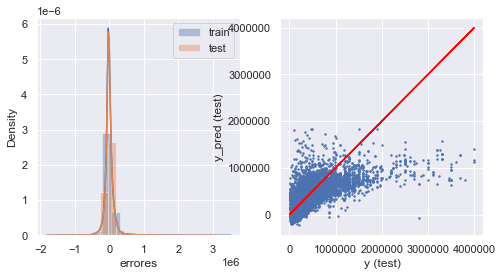

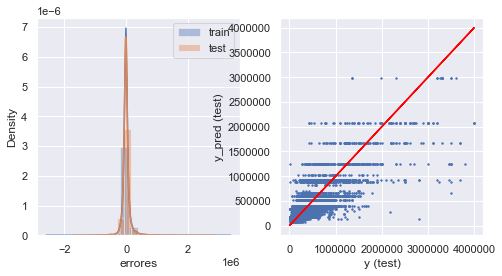

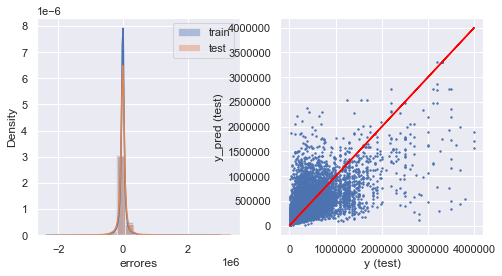

In [ ]:
modelitos(X_train,y_train,X_test, y_test, n_maxprof=5, n_knn=5)

La validacion de los modelos se hacen con una grafica de y_pred vs y_test.

Para entender el resultado de y_pred vs y_test hay que tener en cuenta que para todos los modelos por lo general tienen que seguir una tendencia que se comporta como una linea recta, y los puntos deben coincideir sobre la misma linea de tal manera que si esto pasa, el valor predicho es igual al testeado, para un caso ideal. Sin embargo no es lo que buscamos. 
El score de r2 tambien se puede relacionar y nos ayuda a entender que tan bueno es el modelo.

Las graficas de y_pred vs y_test evidencian lo siguiente:

1. Regresion lineal: Los valores empiezan con una tendencia creciente, pero llega a un punto donde los valores predichos contra los testeados empiezan a volverse constantes. Se puede evindenciar que no es un buen modelo y se confirma con el valor de r2.

2. Arbol de decision: En este caso podemos observar un comportamiento en ecalera, el cual es normal ya que el modelo del arbol precisamente lo que hace es tomar deciciones y hacerse preguntas, partiendo de nodos y asignando valores.
Se puede considerar como un buen modelo ya que sigue la tendencia de la recta, apesar de sus dispersion en los puntos, al parecer los valores predichos se ajustan mas. Y esto se puede evidenciar en el score r2.

3. Vecinos mas cercanos: Podemos observar que los puntos estan muy dispersosn pero se ajusta mejor a la linea recta en comparacion con los modelos anteriores;no de una manera perfecta pero se ve la tendencia con un mayor numero de puntos en los valores bajos, asi como en el dataset, la media de precios se encuentra muy por debajo de $3000000.

4. Por ultimo la densidad de probabilidad evidencia que tenemos una gaussiana pero que esta alargada, lo que representa una baja desviacion estandar. Es una campana de gauss normal, pero se alarga en la mitad. y la distribucion es mayor en el entrenamiento que en el testeo, que es lo que pasa normalmente.

## ***Modelos comparacion***

***Modelo: Regresión lineal.***

1. Raíz del error cuadrático medio en Train: 199173.83253528475
2. Raíz del error cuadrático medio en Test: 202449.36540361578
3. r2 en Train es :  0.5517887107017188
4. r2 en Test es :  0.55148643587972



***Modelo: Árbol de Decisión.***

1. Raíz del error cuadrático medio en Train: 178947.60749154066
2. Raíz del error cuadrático medio en Test: 183592.64362839411
3. r2 en Train es :  0.6381987830784361
4. r2 en Test es :  0.631147022914002

***Modelo: Vecinos más cercanos.***

1. Raíz del error cuadrático medio en Train: 121300.24049431273
2. Raíz del error cuadrático medio en Test: 155040.1332898459
3. r2 score en train :  0.8337576939918325
4. r2 score en Test:  0.7369544202301519
 

*Relacionando los modelos predichos anteriormente se puede evidenciar que hay una diferencia, entre los resultados.* 

Analizando los valores de r2 para cada modelo, se obtuvo un valor mas alto para un arbol de decision de regresion (r2 = 0,67). Por otro lado, para un KNN y un modelo de regresion lineal, no ocurrio lo mismo. Las transformaciones y escalado de datos, para este caso en particular, no hizo mayor diferencia a la hora de predecir nuestra variable precio. 

El valor de RMSE en este nuevo modelo, encontramos una disminucion del valor para un regresor lineal y el modelo de arbol, lo cual indica que hay una menor desviacion estandar de la varianza, independientemente del valor de r2. Hay que tener en cuenta que, este nuevo algoritmo contiene mas variables independientes y mas columnas y mas filas ([ (81019, 6) - (127431, 11) ]). aumentando la dispersion de los datos.

Otra hipotesis sobre por que es mejor el modelo benchmark en KNN y una Regresion lineal, se basa en la cantidad de datos, ya que se selecciono solo capital federal para el analisis anterior y 3 tipos de propiedades, por lo que se espera, una disminucion en el error que existe en las variables. Esto convierte el problema menos complejo.

Sin embargo vamos a probar con otros modelos avanzados.



-----------------------------------------------------------------------------

# ***Algoritmo 2***

En esta segunda etapa vamos a usar modelos de ML avanzados y evaluarlos con la metrica de r2. Tambien se optimizaran hiperparametros.

1. Entrenaremos un modelo de Random Forest: Se sabe que los random forest son robustos a outliers y no es necesario realizar un standar scaler. El escalado se realiza para normalizar los datos, para no darle prioridad a una caracteristica determinada. Esto es importante en algoritmos que se basan en distancias euclidianas.


*El unico filtro que usaremos es en longitud y latitud, ya que se presentan outliers que realmente no pertecen a una localizacion especifica, en este caso Gran Buenos Aires.*

## ***data (df)***

In [ ]:
df = independiente_variable

**realizamos filtro para latitud, quitando unicamente las filas**

In [ ]:
df = df.drop(df.loc[df['lat'] > -33].index)

In [ ]:
df.shape

(131068, 13)

## ***X-y Train X-y Test***

In [ ]:
Xr = df.drop('price', axis = 1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.30, random_state=42)

## ***Modelo avanzado Random Forest (Random Search)***

Random search explora opciones y combinaciones al azar, de manera menos ordenada. Suele ser mas eficiente que GridSearhc en muchos casos, tanto en el punto de vista de performance del modelo como de desempeño computacional. La metrica en este caso es r2.

Se exploraran diferentes opciones y combinaciones al azar.


In [ ]:
rf = RandomForestRegressor()

In [ ]:
# grilla 

param_dist = {'n_estimators': np.arange(80,100),
              'max_features': ['auto'],
              'criterion': ['mse'],
             }


In [ ]:
model = RandomizedSearchCV(rf, param_dist,n_iter=8, random_state=42, cv=5, n_jobs=-1)


model_fit = model.fit(X_train, y_train)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'n_estimators': 80, 'max_features': 'auto', 'criterion': 'mse'}
Mejor Score: 0.8045437034279803



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,36.326748,0.736713,0.631145,0.014353,80,auto,mse,"{'n_estimators': 80, 'max_features': 'auto', '...",0.785931,0.780122,0.846307,0.833396,0.776962,0.804544,0.029258,1
1,43.638036,0.850427,0.855501,0.040465,97,auto,mse,"{'n_estimators': 97, 'max_features': 'auto', '...",0.786425,0.779062,0.841183,0.814019,0.776035,0.799345,0.024849,3
2,43.452912,0.853417,0.842731,0.043874,95,auto,mse,"{'n_estimators': 95, 'max_features': 'auto', '...",0.783769,0.778684,0.842065,0.814621,0.769238,0.797676,0.026909,7
3,37.026673,0.825726,0.627863,0.022075,81,auto,mse,"{'n_estimators': 81, 'max_features': 'auto', '...",0.780019,0.778349,0.842325,0.814517,0.777948,0.798632,0.025873,5
4,40.886884,0.691537,0.740826,0.053369,88,auto,mse,"{'n_estimators': 88, 'max_features': 'auto', '...",0.782193,0.778388,0.839698,0.812645,0.770899,0.796765,0.025747,8
5,38.791814,0.441328,0.758899,0.091828,85,auto,mse,"{'n_estimators': 85, 'max_features': 'auto', '...",0.788082,0.782406,0.842058,0.808911,0.774476,0.799187,0.024282,4
6,36.575867,4.112653,0.507109,0.028252,91,auto,mse,"{'n_estimators': 91, 'max_features': 'auto', '...",0.787373,0.778176,0.840561,0.818918,0.776868,0.800379,0.025192,2
7,28.227554,1.292947,0.399034,0.039365,83,auto,mse,"{'n_estimators': 83, 'max_features': 'auto', '...",0.783924,0.780291,0.841373,0.810326,0.775109,0.798205,0.024773,6


In [ ]:
prediction = model_fit.predict(X_test)

In [ ]:
r2 = r2_score(y_test, prediction)

In [ ]:
print("El valor de r2 para Random Forest con n = 83 es: \n" , r2)

El valor de r2 para Random Forest con n = 83 es: 
 0.574029159073987


El modelo se comporta muy bien en el entrenamiento, pero en el testeo el valor de r2 baja 3 decimas aproximadamente.

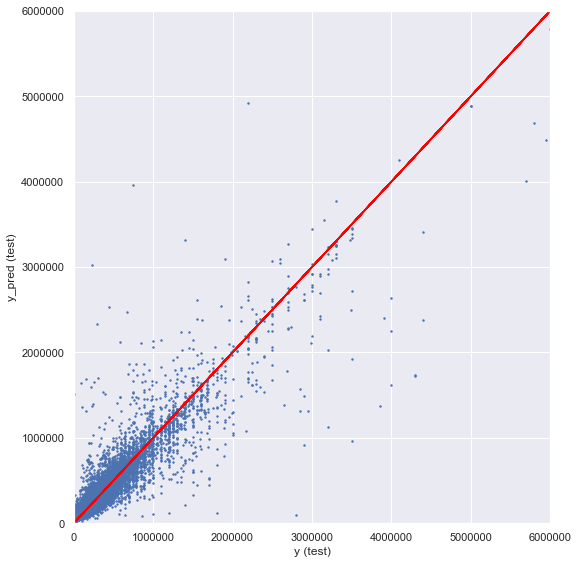

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,prediction, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,6000000)
plt.ylim(0,6000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_predichos vs y_test para el modelo de random forest demuestra que los puntos no estan tan dispersos, lo que significa que los valores predichos estan cerca a los valores testeados. por otro lado, el valor de r2 no es tan alto en este caso. 
Vemos que hay mayor cantidad de datos para valores de precio bajo, y para valores altos los puntos se encuentran muy dispersos. Por esta razon podria pensarse que el modelo no se ajusta del todo bien a la hora de predecir.

--------------------------------------------------------------------------------

### ***Vamos a correr el modelo nuevamente para poder observar las variables mas importantes.***

In [ ]:
rf1 = RandomForestRegressor(n_estimators=80)
RF1 = rf1.fit(X_train, y_train)

In [ ]:
RF1.feature_importances_

array([0.08466222, 0.0909692 , 0.02390086, 0.01540953, 0.31461341,
       0.06422924, 0.26407377, 0.02497045, 0.00084498, 0.11392289,
       0.00074847, 0.001655  ])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

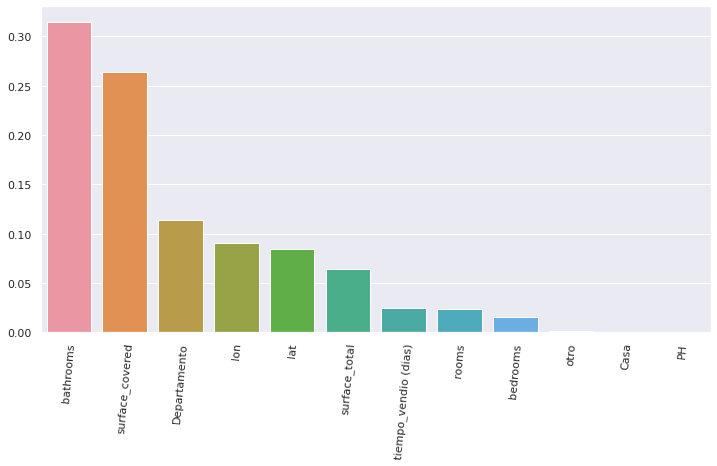

In [ ]:
importances = RF1.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

*La variable mas importante para el modelo de random forest con n_estimadores = 83, es bathrooms, surface_covered and total, y Departamento.*

*Las variables que menos peso tienen son, casa, PH, otros, bedrooms.*

--------------------------------------------------------------------------------

# ***algoritmo 3***

Para este algoritmo vamos a utilizar un modelo de regresion con atributos polinomicos. Es bien sabido que este tipo de modelos son sensibles a outliers, por lo tanto vamos a eliminarlos, por medio del rango intercuartilico.
Ademas, la realizacion de un Standar Scaler es importante para llevar las variables a una escala de dimension parecidas o comparables.

1. outliers
2. standar scaler
3. modelo lineal y regularizacion ridge.

## ***data (df2)***

definimos nuestro dataset

In [ ]:
df2 = independiente_variable

### ***Correlacion***

La multicolinealidad es la relacion de dependencia lineal fuerte entre mas variables explicativas. El supuesto de Gauss - Markov sobre la no multicolinealidad define, que las variables explciativas en una muestra no pueden ser constantes y no deben existir relaciones lineales exactas entre variables explicativas. 

Por ejemplo, la edad y la experiencia suelen presentar una alta relacion ya que ambas crecen conjuntamente. A mayor edad, mayor experiencia. Por tal motivo es dificil separar el efecto de cada una sobre la variable dependiente, debido a la relacion causal existente entre dichas variables.

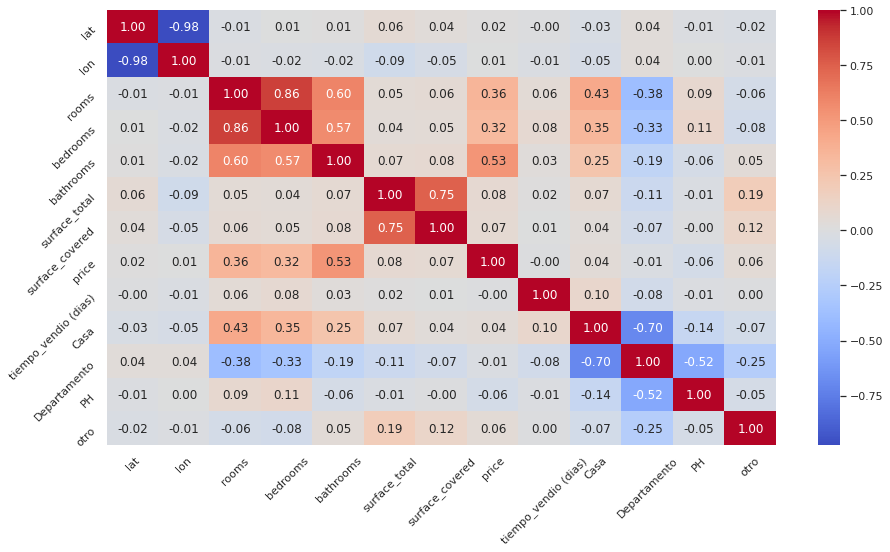

In [ ]:
corr = df2.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

*Analizamos la correlacion de nuestras variables, y asi determinamos que features se pueden explicar entre ellas. De esta forma se analizo que columnas tienen una correlacion cercana a 1 o -1, y de esta manera poder disminuir la dimensionalidad del dataset a la hora de entrenar los modelos lineales*

Las variables cercanas a estos valores son, latitud y longitud, posiblemente bedrooms y rooms.

--------------------------------------------------------------------------------

## ***Outliers***

Vamos a remover los outliers usando el rango intercuartilico.

Usamos la funcion definina anteriormente en ***mapas de localidades***

In [ ]:
df2 = remove_outliers(df2, 'surface_total')

Para este supuesto vamos a eliminar los bathrooms mayores a 8

In [ ]:
df2 = df2.drop(df2.loc[df2['bathrooms'] > 8].index)

In [ ]:
df2 = remove_outliers(df2, 'price')


Eliminamos rooms y bedroom mayores a 10 para que tenga coherencia la eliminacion de bathrooms y no se exeda en el valor (Solo para este algoritmo trabajamos sobre este supuesto).

In [ ]:
df2 = df2.drop(df2.loc[df2['rooms'] > 10].index)

In [ ]:
df2 = df2.drop(df2.loc[df2['bedrooms'] > 10].index)

In [ ]:
df2 = remove_outliers(df2, 'tiempo_vendio (dias)')

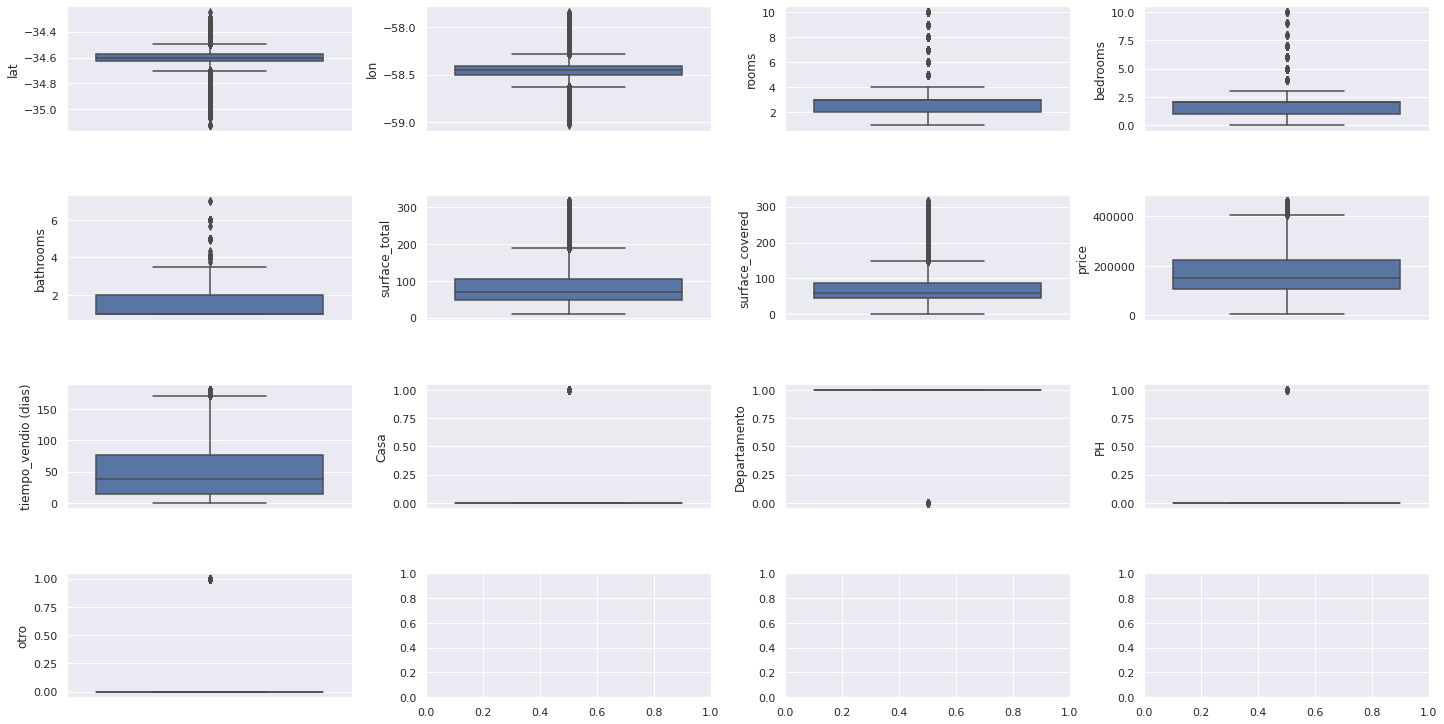

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df2.items():
    sns.boxplot(y=k, data=df2, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Es importante resaltar que para este caso nos quedamos con valores de superficie total y superficie cubierta cerca a la media, y los valores atipicos que estaban muy por encima en ordenes de magnitud ya no esta.

In [ ]:
    for k, v in df2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df2)[0]
        print("Columna %s outliers = %.2f%%" % (k, perc))

Columna lat outliers = 17.11%
Columna lon outliers = 11.68%
Columna rooms outliers = 6.30%
Columna bedrooms outliers = 4.12%
Columna bathrooms outliers = 0.85%
Columna surface_total outliers = 8.18%
Columna surface_covered outliers = 5.61%
Columna price outliers = 2.30%
Columna tiempo_vendio (dias) outliers = 0.58%
Columna Casa outliers = 100.00%
Columna Departamento outliers = 100.00%
Columna PH outliers = 100.00%
Columna otro outliers = 100.00%


* Las columnas con mayor numero de outliers es lat y lon, pero esto se explica facilmente ya que estamos tratando con locaciones, las cuales se distribuyen heterogeneamente al rededor de una region.

* Se puede observar que despues de aplicar la funcion que se rigue por el rango intercuartilico, se obtienen unos porcentajes bajos de outliers.

* Las ultimas 4 variables solo poseen un valor (0 o 1) por lo que apareceran como 100 % de datos atipicos.

*Verificamos la dimensionalidad de nuestro dataset.*

In [ ]:
df2.shape

(105151, 13)

--------------------------------------------------------------------------------

## ***Standar Scaler 2***

Como sabemos nuestros datos tienen diferentes escalas de dimensionalidad, por lo que es necesario aplicar un standar scaler con una 
media de cero y un desviacion estandar = 1, para este caso.

*Hay que separar las variables independientes de nuestro target.*

In [ ]:
XL = df2.drop('price', axis = 1)
y = df2['price']

In [ ]:
scaler2 = StandardScaler()
Scaler2 = scaler2.fit_transform(XL)

## ***X-y Train X-y Test***

*Dividimos nuestro dataset entre train y test para evaluar los modelos posteriormente.*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XL, y, test_size=0.30, random_state=42)

## ***Modelo Avanzado lineal regressor - regularizacion***

### ***Validacion cruzada***


Para mejorar el modelo, podemos Tunear sus parámetros y volver a entrenar y probar, podemos generar features… De hecho, podemos pensar que seleccionamos un mal modelo, y podemos intentar con distintos modelos: regresion lineal, árbol de decisión, ensambles..etc.

La validacion que vamos a utilizar en nuestro proyecto es K-folds.

Lo que vamos hacer es entrenar el modelo y pasarle los registros de Xtrain y_train y que haga el fit. Con K-Folds igual a 5 splits- para entrenar, en vez de pasarle todos los registros directamente al modelo, se hara de la siguiente manera:

Iterar 5 veces:
1. Apartaremos 1/5 de muestras.
2. Entrenamos al modelo con el restante 4/5 de muestras.
3. Mediremos el r2 obtenido sobre la muestra que habíamos apartado.
4. Esto quiere decir que hacemos 5 entrenamientos independientes.
5. El score final será el promedio de los 5 r2 anteriores.


### ***Lineal regressor***

*Vamos a entrenar un modelo de regresion lineal para analisar el mejor score (r2), respecto a uno con atributos polinomicos y regularizacion ridge, usando k folds y random search para optimizar los hiperparametros.*

In [ ]:
lr2 = LinearRegression()
lr2_scores = cross_val_score(lr2, X_train, y_train, cv = 5, scoring='r2')

In [ ]:
print(lr2_scores)
# print(tree_scores.mean(), knn_scores.mean())
print("R2 para linear regressor: %0.2f (+/- %0.2f)" % (lr2_scores.mean(), lr2_scores.std() * 2))

[0.59865923 0.59734069 0.59066931 0.59635157 0.59040788]
R2 para linear regressor: 0.59 (+/- 0.01)


In [ ]:
lr2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict = lr2.predict(X_test)

In [ ]:
r2 = r2_score(y_test, predict)
r2

0.601454280058557

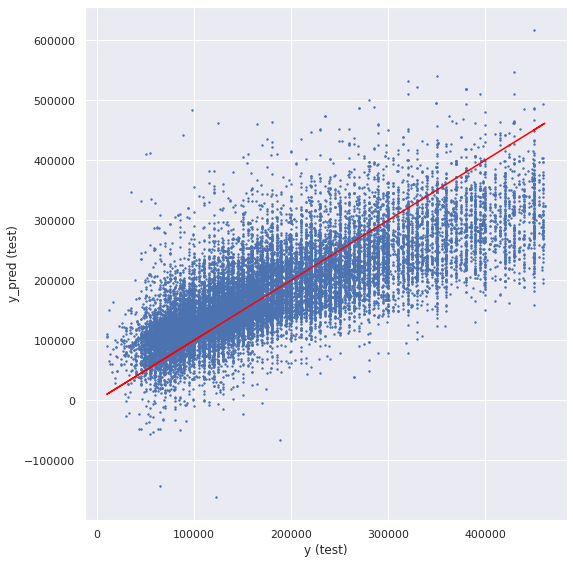

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,predict, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plt.xlim(0,6000000)
#plt.ylim(0,6000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_pred vs y_real muestra una tendencia creciente respecto a la linea rojo, presentando un buen rendimiento del modelo. Sin embargo para valores mayores a 3000000, empieza a ser constante. El valor de r2 no es tan bajo pero no es el mejor para este caso.

El r2 promedio, usando validacion cruzada, en el entrenamiento toma un valor de 0.59. Por otro lado, el r2 en el testeo aumento 0,1 decimas, indicandome que el modelo se ajusto mejor fuera del entrenamiento.  

El rendimiento del modelo es bueno.

Probemos mas...

--------------------------------------------------------------------------------

## ***Atributos polinomicos***

*Usaremos random search para optimizar hiperparametros y un kfolds= 5.*

1. Para utilizar regresion lineal con atributos polinomicos, es necesario determinar las variables mas importantes, de lo contrario el ajuste de grado mayores a 5, seran muy complejos u tendran combinaciones de (n-variables) ^ n grados.

2. Para cumplir con este requisito, las variables mas importantes que escogeremos sera basandonos en el modelo de random forest. Como resultado tenemos las variables: bathrooms, surface_covered, surface_total,Departamento,lon, lat.

3. Como siguiente paso se analizaran las correlaciones que hay entre estas variables.

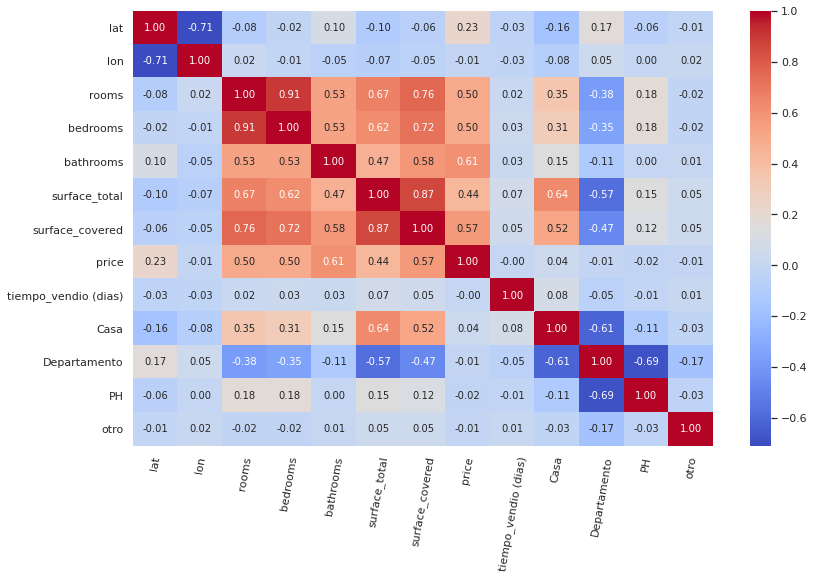

In [ ]:
corr = df2.corr()
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, fmt= '.2f',cmap= 'coolwarm')
plt.xticks(rotation = 80)
plt.yticks(rotation = 0)
plt.show()

1. la variable rooms- bedrooms estan correlacionadas
2. la variable bathrooms- bedrooms estan correlacionadas
3. la variable rooms- bathrooms estan correlacionadas
4. la variable rooms- surface_covered estan correlacionadas
5. la variable bedrooms- surface_covered estan correlacionadas
6. la variable surface_total- surface_covered estan correlacionadas

A partir de estos criterios vamos a determinar nuestras variables para entrenar este modelo de regresion con atributos polinomicos.

a. bathrooms
b. surface_covered
c. Departamento
d. lat

Para usar el metodo Polinomial_Feature y convertirlo en una funcion lineal, es necesario traer de vuelta x e y, hacer un reshape.

In [ ]:
XL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105151 entries, 0 to 131071
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   lat                   105151 non-null  float64
 1   lon                   105151 non-null  float64
 2   rooms                 105151 non-null  float64
 3   bedrooms              105151 non-null  float64
 4   bathrooms             105151 non-null  float64
 5   surface_total         105151 non-null  float64
 6   surface_covered       105151 non-null  float64
 7   tiempo_vendio (dias)  105151 non-null  float64
 8   Casa                  105151 non-null  float64
 9   Departamento          105151 non-null  float64
 10  PH                    105151 non-null  float64
 11  otro                  105151 non-null  float64
dtypes: float64(12)
memory usage: 10.4 MB


### ***Modelo - Random Search con atributo polinomico y utlizando regularizacion ridge***

Eliminamos algunas variables independientes y nos quedamos solamente con 4, para entrenar el modelo.
1. lat
2. bathrooms
3. surface_covered
4. Departamento

In [ ]:
df3 = XL.drop(XL.columns[[1,2,3,5,7,8,10,11]], axis = 1)

verificamos nuestras variables seleccionadas

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105151 entries, 0 to 131071
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              105151 non-null  float64
 1   bathrooms        105151 non-null  float64
 2   surface_covered  105151 non-null  float64
 3   Departamento     105151 non-null  float64
dtypes: float64(4)
memory usage: 4.0 MB


definimos nuestras variables X e y 

In [ ]:
Xp = df3
y = y.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.30, random_state=42)

Regularizacion Ridge :

este metodo fuerza a que los coeficientes del modelo a que tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes.

Polinomial features: Cuando no tenemos un problema lineal, el grado de la funcion que se ajusta a los datos es exponencial, o mayor a un grado 2. Una vez obtenemos el hiperplano que mejor se ajusta, podremos convertirlo en un problema lineal haciendo una transformacion. Posterirmente agregando una funcion de coste, se pueden penalizar los coeficientes, minimizando la complejidad del modelo y a su vez minimizando la funcion de coste.

Entrenamos un modelo ridge con diferentes atributos polinomicos usando un ciclo for con un random search, que me de como resultado los mejores hiperparametros, para cada polinomio de grado n.

In [ ]:
reg_ridge = Ridge()

#definimos los hiperparametros de regularizacion ridge

param = {'alpha': np.arange(0,10,0.5),
         'solver': ['auto', 'svd', 'cholesky'],
        
         }

#creamos una lista vacia para guardar los valores de hiperparametros
guardar = []

#creamos un arreglo de numeros que seran los grados del polinomio
lista = np.arange(3,8)

for i in lista:
  poly = PolynomialFeatures(degree=i , include_bias=False) 
  X_train_new = poly.fit_transform(X_train)
  X_test_new = poly.fit_transform(X_test)


  model3 = RandomizedSearchCV(reg_ridge, param,n_iter=5, random_state=25, cv=5, scoring='r2')


  model3_fit = model3.fit(X_train_new, y_train)
  poli = ("Polinomio de grado: ", i)
  guardar.append(poli)
  guardar.append("Mejores parametros: "+str(model3.best_params_))
  guardar.append("Mejor Score: "+str(model3.best_score_))
  
  


In [ ]:
guardar

[('Polinomio de grado: ', 3),
 "Mejores parametros: {'solver': 'svd', 'alpha': 1.0}",
 'Mejor Score: 0.5965876950093953',
 ('Polinomio de grado: ', 4),
 "Mejores parametros: {'solver': 'svd', 'alpha': 1.0}",
 'Mejor Score: 0.5995159077728249',
 ('Polinomio de grado: ', 5),
 "Mejores parametros: {'solver': 'svd', 'alpha': 1.0}",
 'Mejor Score: 0.613876466405502',
 ('Polinomio de grado: ', 6),
 "Mejores parametros: {'solver': 'cholesky', 'alpha': 4.5}",
 'Mejor Score: 0.6259261521418501',
 ('Polinomio de grado: ', 7),
 "Mejores parametros: {'solver': 'cholesky', 'alpha': 4.5}",
 'Mejor Score: -50.43208021084076']

***Entrenamos el modelo nuevamente con el mejor hiperparametro encontrado, por el momento, para obtener la pendiente y la ordenada.***

In [ ]:
poly = PolynomialFeatures(degree= 6, include_bias=False) 
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

reg_ridge = Ridge(alpha=4.5, solver = 'cholesky')
reg_ridge.fit(X_train_new,y_train)

Ridge(alpha=4.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[ 5.66756856e+04  2.36304154e+04 -2.78236926e+04  1.55307213e+04
  -2.49261871e+04 -7.23787864e+04 -1.36728997e+04 -9.24792870e+04
  -3.45015348e+04 -1.50765461e+05 -4.16550350e+04  5.89198620e+04
  -1.17369896e+05  3.70170218e+03  1.72778572e+04 -6.65478261e+04
  -1.00666591e+05  7.04155332e+04 -9.87635480e+03 -4.05945126e+04
  -5.84739469e+04  1.56555064e+04  1.47965502e+05  5.36551493e+04
   1.17625635e+04 -6.00958817e+03 -1.27685394e+04  2.86297221e+04
  -3.48568307e+04  8.28306209e+03 -3.95919398e+03  2.11644031e+03
   2.12548713e+04  2.62197414e+04  1.08094672e+05 -2.12748267e+03
  -1.01257613e+04 -1.92592014e+04  1.76778267e+04 -3.52384281e+03
   2.00750565e+04  3.62621458e+02 -7.28440200e+04  5.28100589e+03
  -2.76694890e+04  4.75170637e+04  1.71404704e+04  1.41816971e+03
  -5.44278113e+04 -1.18598105e+02 -4.65182151e+02 -1.45394479e+04
   4.86881995e+04 -8.12215289e+04  3.58096346e+04  3.78774582e+04
  -5.95417685e+04  3.10683855e+03 -8.96062463e+04 -7.12085011e+0

In [ ]:
y_train_pred = reg_ridge.predict(X_train_new)
y_test_pred = reg_ridge.predict(X_test_new)

In [ ]:
r2 = r2_score(y_train, y_train_pred)
R2 = r2_score(y_test, y_test_pred)

In [ ]:
print(r2)  
print(R2)

0.6315852462286633
0.6396053545165712


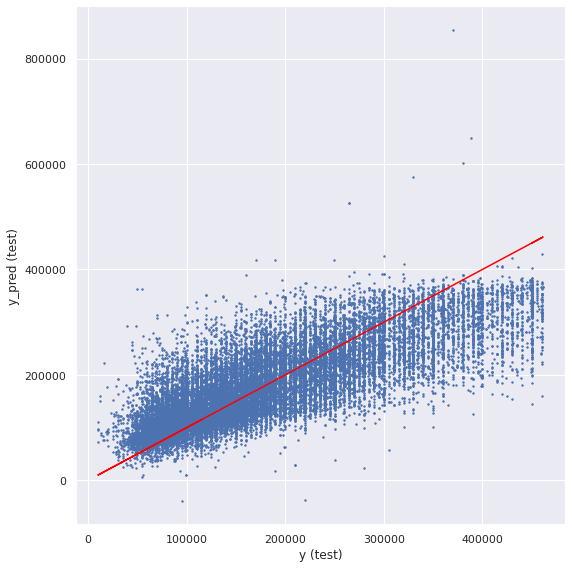

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
#plt.xlim(0,6000000)
#plt.ylim(0,6000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_pred vs y_test muestra que los puntos no estan tan dispersos, y siguen el comportamiento de la recta hasta valores inferiores a 4000000. Lo que lo hace uno de los mejores modelos hasta ahora, confirmando esto con el score de r2 para el testeo y el entrenamiento.

Para un polinomio de grado 6 y un ridge con un valor de alpha de 4.5, se alcanzo un r2 en el testeo de un 0.6396053545165712. Este valor del modelo supera al de regresion lineal (0.601454280058557).

En validacion cruzada con Random Search se obtuvo, un mejor hiperparametro de grado 6 con un valor de alpha de 4.5 con un r2 en el entrenamiento de 0.6259261521418501.  Es un mejor modelo que el utilizado con un regresor lineal sin atributos polinomicos.

*A veces, Lo modelos que son excesivamente complejos tienden a sobreajustar. Es decir, a encontrar una solución que funciona muy bien para los datos de entrenamiento pero muy mal para datos nuevos*


# ***Algoritmo 4***

Para este modelo, implementaremos algo distinto a lo anterior. Ahora usaremos combinaciones de transformaciones, tratando de cambiar la distribucion de algunas de nuestras variables independientes(kernel gaussiano), con el fin de determinar que tanto cambia nuestra metrica de evaluacion del modelo random forest, usando un standar scaler despues de realizar el cambio de distribucion, para llevarlo a una media = 0 y desviacion estandar = 1, y generando nuevas variables predictoras.


1. Observamos la distribucion de las variables.
2. Observamos la distribucion de las variables con una transformacion .gausseana, con un codigo muy artesanal.
3. Generamos nuevas variables predictoras.
4. Outliers
5. Standar Scaler
6. Entrenamos un modelo de Random Forest
7. Modelo lineal con atributo polinomico y regularizacion ridge

## ***data***

In [80]:
dat = independiente_variable.copy()

In [81]:
dat1 = dat.copy()

In [82]:
dat1

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias),Casa,Departamento,PH,otro
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,67.0,0.0,1.0,0.0,0.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,35.0,0.0,0.0,1.0,0.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,15.0,0.0,0.0,1.0,0.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,67.0,0.0,0.0,1.0,0.0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,146.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,13.0,0.0,1.0,0.0,0.0
131068,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,14.0,0.0,1.0,0.0,0.0
131069,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,14.0,0.0,1.0,0.0,0.0
131070,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,14.0,0.0,1.0,0.0,0.0


## ***distribucion de las variables sin transformacion***

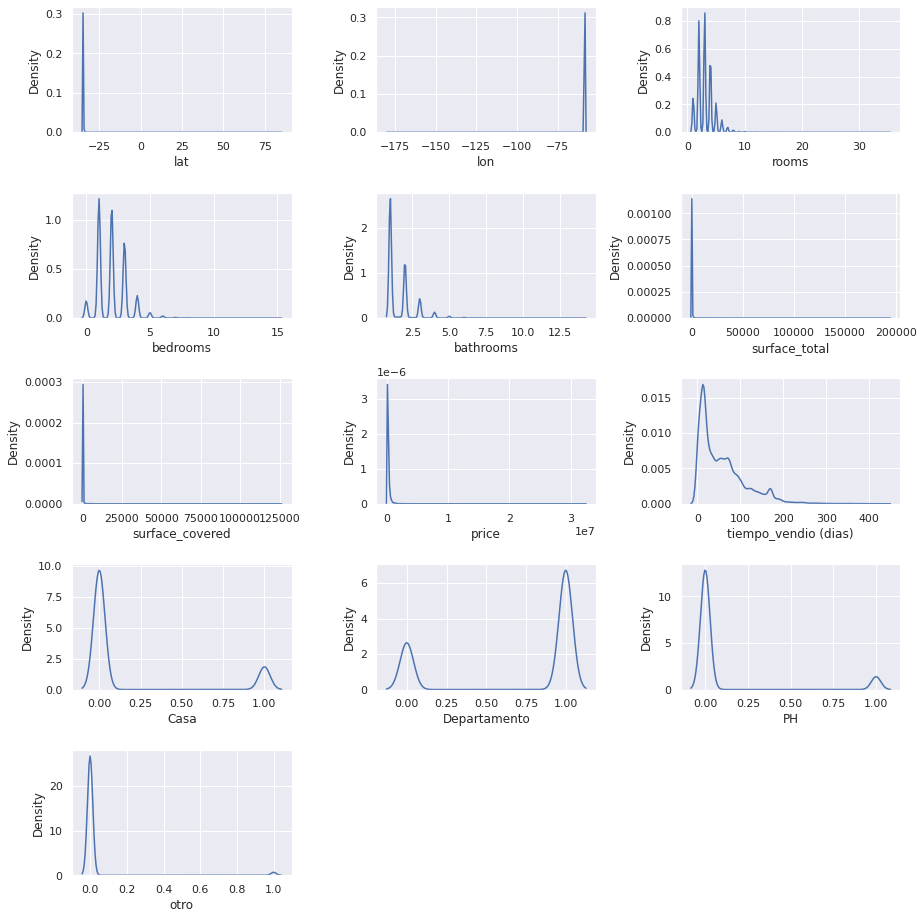

In [83]:
plt.figure(figsize=(13,15))
for i, column in enumerate(dat.columns, 1):
    plt.subplot(6,3, i)
    sns.kdeplot(dat[column])
    plt.tight_layout()
    

Observamos el comportamiento de la densidad de distribucion de cada variable. Ahora lo que queremos es forzar a algunas variables independientes a tener un comportamiento gauss. El target no sera tratado de esta manera.

## ***Aplicacion del Kernel Gaussiano***

Definimos una funcion gaussiana y la aplicamos a  los datos, manualmente.
oberservemos que sigma es una constante que podemos variar, para este caso sera 5.

In [84]:
sigma = 5
f = dat1.iloc[:, [0,1,2,3,4,5,6,8]]
for i in f:
  #dat[i] = dat[i]/np.std(dat[i])
  dat1[i] = (-1 / (sigma * np.sqrt(2*(np.pi))))*(np.exp(-(dat1[i]**2) / (2 * (sigma)**2)))

print("kernel gaussian done = ) ", "sigma = ",sigma)

kernel gaussian done = )  sigma =  5


## ***Distribucion de las variables con transformacion (Kernel Gaussiano)***

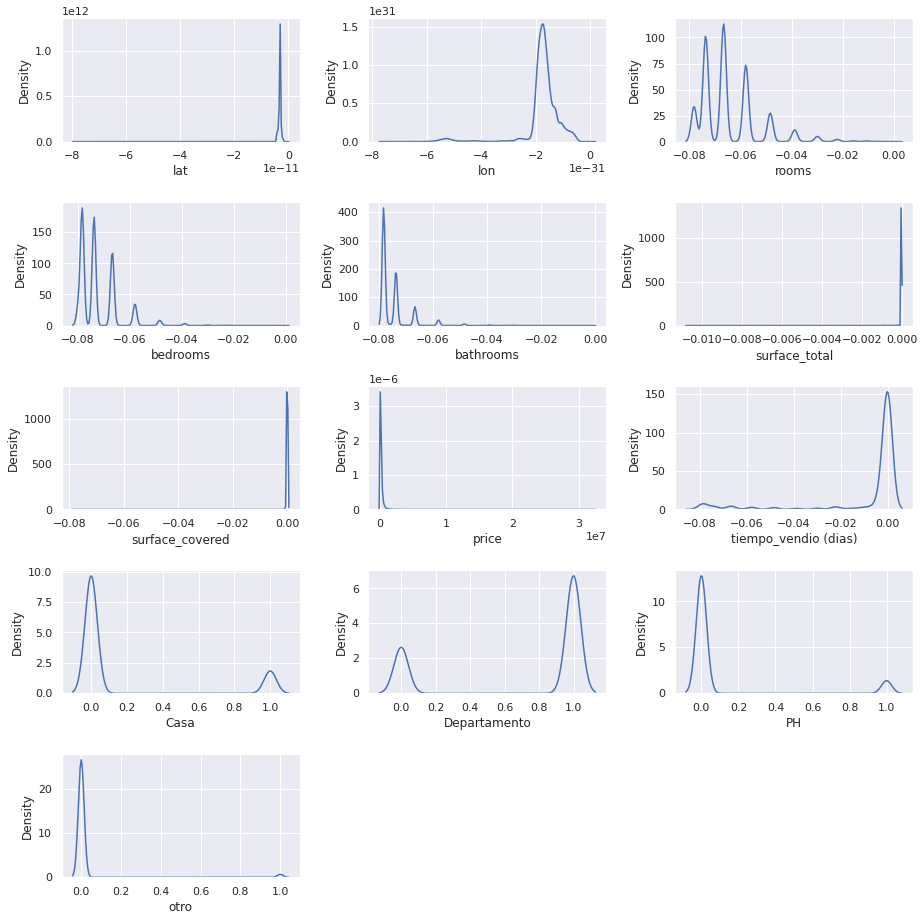

In [85]:
plt.figure(figsize=(13,15))
for i, column in enumerate(dat1.columns, 1):
    plt.subplot(6,3, i)
    sns.kdeplot(dat1[column])
    plt.tight_layout()
    

Podemos apreciar el cambio de comportamiento de nuestras variables independientes, ademas de la disminucion en la densidad.
La hipotesis trata de determinar si para este caso el modelo mejora o no, al hacer este tipo de transformaciones. 

## ***Nuevas variables predictoras***

***Generamos nuevas variables predictoras***

In [86]:
dat1['baños/rooms'] = dat1['bathrooms'] / dat1['rooms']
dat1['bedrooms/rooms'] = dat1['bedrooms'] / dat1['rooms']
dat1['sup cubierta / sup total '] = dat1['surface_covered'] / dat1['surface_total']
#dat['algoritmo rooms'] = np.log([dat['rooms']]).reshape(-1,1)
#dat['algoritmo surface_total'] = np.log([dat['surface_total']]).reshape(-1,1)

In [87]:
dat1.columns

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'tiempo_vendio (dias)', 'Casa',
       'Departamento', 'PH', 'otro', 'baños/rooms', 'bedrooms/rooms',
       'sup cubierta / sup total '],
      dtype='object')

## ***outliers 4***

Vamos a remover outliers basandonos en el rango intercuartilico, usando la funcion llamada anteriormente.

In [89]:
dat1 = remove_outliers(dat, 'lat')
dat1 = remove_outliers(dat, 'lon')
dat1 = remove_outliers(dat, 'rooms')
dat1 = remove_outliers(dat, 'bedrooms')
dat1 = remove_outliers(dat, 'bathrooms')
dat1 = remove_outliers(dat, 'surface_total')
dat1 = remove_outliers(dat, 'surface_covered')
dat1 = remove_outliers(dat, 'price')
dat1 = remove_outliers(dat, 'tiempo_vendio (dias)')

In [90]:
dat1.shape

(127724, 13)

## ***Standar Scaler 4***

In [91]:
X4 = dat1.drop('price', axis = 1)
y = dat1['price']

In [92]:
scaler4 = StandardScaler()
Scaler4 = scaler4.fit_transform(X4)

## ***Train-Test split 4***

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.30, random_state=42)

## ***Random forest***

Como ya sabemos el random forest es robusto a outliers, sin embargo en esta ocacion vamos a trabajar nuestros datos sacando valores atipicos usando el rango, intercuartilico y ver el desempeño que obtenemos.

In [94]:
rf4 = RandomForestRegressor()

In [95]:
# grilla 

param_dist = {'n_estimators': np.arange(80,100),
              'max_depth': np.arange(5,8),
              'criterion': ['mse','mae'],
             }


In [96]:
model4 = RandomizedSearchCV(rf4, param_dist,n_iter=5, random_state=42, cv=5)


model_fit4 = model4.fit(X_train, y_train)

In [97]:
print("Mejores parametros: "+str(model4.best_params_))
print("Mejor Score: "+str(model4.best_score_)+'\n')

scores = pd.DataFrame(model4.cv_results_)
scores

Mejores parametros: {'n_estimators': 95, 'max_depth': 7, 'criterion': 'mse'}
Mejor Score: 0.5545574746023416



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.875585,0.049663,0.119803,0.003178,84,7,mse,"{'n_estimators': 84, 'max_depth': 7, 'criterio...",0.588423,0.631049,0.409386,0.405846,0.689983,0.544938,0.116675,2
1,19.752176,0.424918,0.132572,0.006552,87,7,mse,"{'n_estimators': 87, 'max_depth': 7, 'criterio...",0.571672,0.637772,0.396808,0.405075,0.688098,0.539885,0.119335,3
2,14.600962,0.047367,0.094400,0.004512,84,5,mse,"{'n_estimators': 84, 'max_depth': 5, 'criterio...",0.567027,0.605802,0.285851,0.381453,0.612484,0.490523,0.132517,5
3,21.791662,0.120220,0.141996,0.004417,95,7,mse,"{'n_estimators': 95, 'max_depth': 7, 'criterio...",0.589922,0.640508,0.441002,0.409754,0.691601,0.554557,0.110709,1
4,17.254951,0.102473,0.112257,0.005869,86,6,mse,"{'n_estimators': 86, 'max_depth': 6, 'criterio...",0.587420,0.622121,0.342596,0.393518,0.657471,0.520625,0.127546,4


In [98]:
prediction = model_fit4.predict(X_test)

In [99]:
r2 = r2_score(y_test, prediction)
r2

0.7044233520636916

Entrenamos el modelo nuevamente para determinar las variables mas importantes para random forest.

In [100]:
rf4 = RandomForestRegressor(n_estimators= 84, max_depth= 7, criterion= 'mse')
RF4 = rf4.fit(X_train, y_train)

In [101]:
RF4.feature_importances_

array([0.04915422, 0.05020402, 0.01347832, 0.00482184, 0.35759101,
       0.11187775, 0.26637809, 0.03239889, 0.00851952, 0.10508105,
       0.        , 0.00049529])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

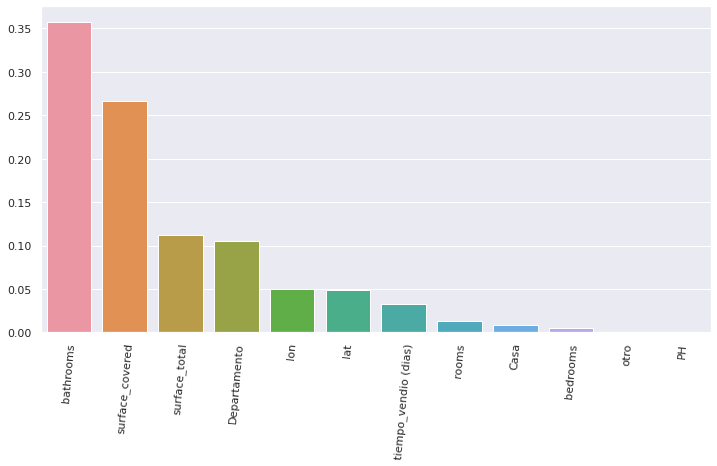

In [102]:
importances = RF4.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

In [103]:
predic = RF4.predict(X_test)

In [104]:
r4  = r2_score(y_test, predic)
r4

0.7407070053673062

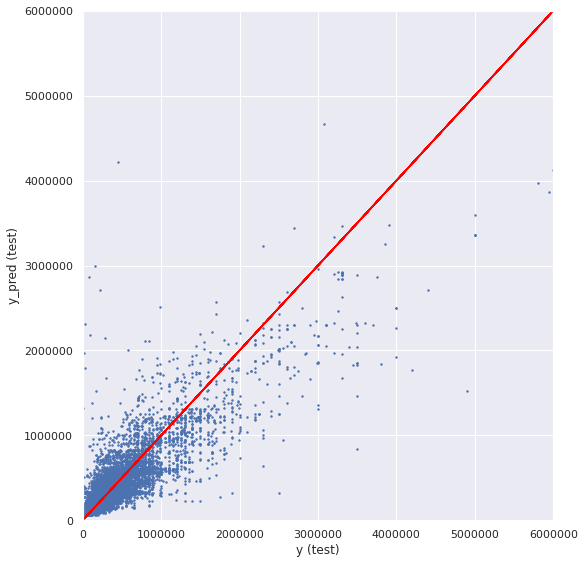

In [106]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,predic, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,6000000)
plt.ylim(0,6000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_pred vs y_test evdencia que el modelo de random forest predice mucho mejor que otros modelos. Aqui se puede observar facilmente la tendencia lineal, sin embargo para valores ya demasiado altos no es tan eficiente prediciendo precios, y la distribucion de los datos crece cada vez mas.

Para este caso tenemos valores de r2 muy cercanos para train y test, justificando que el modelo se ajusta muy bien a nuestros datos. Hasta el momento serian los valores de r2 mas altos que podemos obtener para un modelo en este proyecto. Sin embargo, cambiar la distribucion no es tan conveniente ya que estamos modificando el comportamiento de nuestras variables. Por otro lado, puede que para este caso funcionara muy bien, pero puede que para otro modelo de regresion diferente, las cosas empeoren mucho mas.

## ***Modelo con atributos polinomicos y regularizacion ridge***

In [ ]:
df4 = X4.drop(X4.columns[[1,2,3,5,7,8,10,11]], axis = 1)

verificamos nuestras variables seleccionadas

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127724 entries, 0 to 131071
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              127724 non-null  float64
 1   bathrooms        127724 non-null  float64
 2   surface_covered  127724 non-null  float64
 3   Departamento     127724 non-null  float64
dtypes: float64(4)
memory usage: 4.9 MB


definimos nuestras variables X e y para el modelo lienal, haciendo un reshape

In [ ]:
Xp2 = df4
y1 = y.values.reshape(-1,1)

### ***Train-Test split 4***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xp2, y1, test_size=0.30, random_state=42)

### ***Implementacion regularizacion ridge***

Entrenamos un modelo ridge con diferentes atributos polinomicos usando un ciclo for con un random search, que me de como resultado los mejores hiperparametros, para cada polinomio de grado n.

In [ ]:
reg_ridge = Ridge()

#definimos los hiperparametros de regularizacion ridge

param = {'alpha': np.arange(0,5,0.2),
         'solver': ['auto', 'svd', 'cholesky'],
        
         }

#creamos una lista vacia para guardar los valores de hiperparametros
guardar = []

#creamos un arreglo de numeros que seran los grados del polinomio
lista = np.arange(3,8)

for i in lista:
  poly = PolynomialFeatures(degree=i , include_bias=False) 
  X_train_new = poly.fit_transform(X_train)
  X_test_new = poly.fit_transform(X_test)


  model3 = RandomizedSearchCV(reg_ridge, param,n_iter=5, random_state=25, cv=5, scoring='r2')


  model3_fit = model3.fit(X_train_new, y_train)
  poli = ("Polinomio de grado: ", i)
  guardar.append(poli)
  guardar.append("Mejores parametros: "+str(model3.best_params_))
  guardar.append("Mejor Score: "+str(model3.best_score_))
  
  


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=6.15303e-31): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=6.70719e-31): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=7.33906e-30): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=6.34818e-31): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=6.1453e-31): result may not be accurate.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=6.46468e-31): result may not be accurate.

/usr/local/lib/py

In [ ]:
guardar

[('Polinomio de grado: ', 3),
 "Mejores parametros: {'solver': 'cholesky', 'alpha': 4.2}",
 'Mejor Score: -4448.955604054988',
 ('Polinomio de grado: ', 4),
 "Mejores parametros: {'solver': 'cholesky', 'alpha': 4.2}",
 'Mejor Score: -351110.15855207737',
 ('Polinomio de grado: ', 5),
 "Mejores parametros: {'solver': 'cholesky', 'alpha': 1.8}",
 'Mejor Score: -369452.1096139057',
 ('Polinomio de grado: ', 6),
 "Mejores parametros: {'solver': 'auto', 'alpha': 4.0}",
 'Mejor Score: -3810975.031602455',
 ('Polinomio de grado: ', 7),
 "Mejores parametros: {'solver': 'auto', 'alpha': 4.0}",
 'Mejor Score: -1281728504.7916982']

Este modelo de regresion con atributos polinomicos, evidencia que haciendo transformaciones que modifiquen directamente la distribucion de nuestros datos, afecta de manera negativa, obteniendo valores de r2 de -1281728504.7916982, entre otros. 
Esto se interpreta como un modelo extremadamente malo e ineficiente que no puede predecir ningun dato de manera exacta. 

--------------------------------------------------------------------------------

# ***Algoritmo 5***

Para este algoritmo vamos a implementar nuevas variables predictoras, y determinar si aportan al modelo. En este caso sera Adaboost Regressor, random forest y baggin quienes indiquen el mejor score r2. La reduccion de dimensionalidad que vamos a implementar sera por PCA, donde se obtendra el porcentaje de la varianza acumulativa y asi poder analisar el numero optimo de features que podemos reducir sin perder mucha informacion. 

1. Nuevas variables predictoras
2. Train - Test
3. Adaboost Regressor
4. Random forest
5. BaggingRegressor

## ***data 5***

In [ ]:
dat5 = independiente_variable.copy()

In [ ]:
dat5['tiempo_venta / surf_cov'] =  dat5['tiempo_vendio (dias)'] / dat5['surface_covered']
dat5['log [bathrooms / surface_covered]'] = np.log(dat5['bathrooms'] / dat5['surface_covered'])

In [ ]:
dat5

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,tiempo_vendio (dias),Casa,Departamento,PH,otro,tiempo_venta / surf_cov,log [bathrooms / surface_covered]
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,67.0,0.0,1.0,0.0,0.0,0.478571,-4.248495
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,35.0,0.0,0.0,1.0,0.0,0.603448,-3.367296
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,15.0,0.0,0.0,1.0,0.0,0.333333,-3.806662
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,67.0,0.0,0.0,1.0,0.0,1.340000,-3.912023
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0,146.0,0.0,0.0,1.0,0.0,4.171429,-3.555348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131067,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0,13.0,0.0,1.0,0.0,0.0,0.270833,-3.871201
131068,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0,14.0,0.0,1.0,0.0,0.0,0.155556,-3.806662
131069,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0,14.0,0.0,1.0,0.0,0.0,0.400000,-3.555348
131070,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0,14.0,0.0,1.0,0.0,0.0,0.368421,-3.637586


**realizamos filtro para latitud, quitando unicamente las filas**

In [ ]:
dat5 = dat5.drop(dat5.loc[dat5['lat'] > -33].index)

In [ ]:
dat5.shape

(131068, 15)

## ***X-y Train X-y Test***

In [ ]:
X5 = dat5.drop('price', axis = 1)
y = dat5['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.30, random_state=42)

## ***Tecnica BOOSTING***

AdaBoost, consiste en crear varios predictores sencillos en secuencia, de tal manera que, el segundo ajuste bien lo que el primero no ajustó, que el tercero ajuste un poco mejor lo que el segundo no pudo ajustar y así sucesivamente.
Ademas, se entrena una secuencia de modelos donde se da más peso a los ejemplos que fueron clasificados erróneamente por iteraciones anteriores.

In [ ]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8)
                             ,n_estimators=120
                            )
# Entrenamos el modelo
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=8,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
y_train_pred = ada_reg.predict(X_train)
y_test_pred = ada_reg.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


0.7386217735403653
0.452011709042503


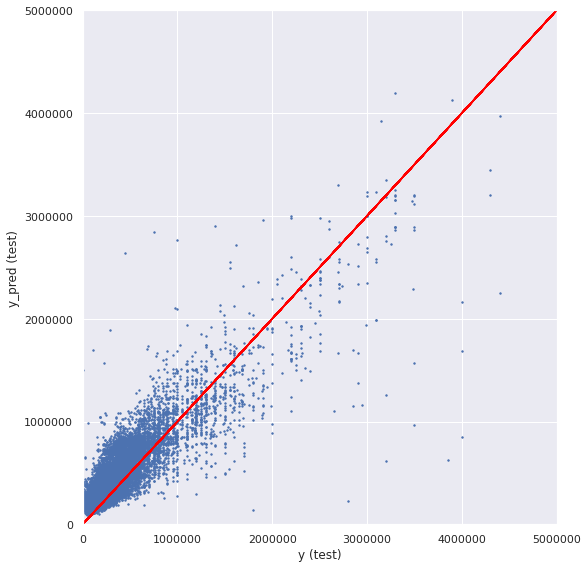

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,5000000)
plt.ylim(0,5000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_pred vs y_test muestra un buen comportamiendo del modelo para predecir la variable precio, sin embargo se ve mucha dispersion de los datos en todo el rango, que empiezan a detallarse mas desde $1000000. El r2 explica que no hay una buena prediccion, posiblemente un subajuste. 

Se presenta un buen ajuste para el entrenamiento r2 = 0.74806, pero en el set de testeo disminuye considerablemente a r2 = 0.45069. 

Posiblemente estamos sobreajustando nuestros datos.

***Random search***

In [ ]:


param_grid = {"n_estimators": np.arange(80,100),
              "base_estimator__splitter" :   ["best", "random"],
             }


DTR = DecisionTreeRegressor(random_state=42, max_depth= 8 )

ABC = AdaBoostRegressor(base_estimator = DTR)

# run grid search
reg = RandomizedSearchCV(ABC, param_grid, n_iter=5, cv = 5,  scoring = 'r2')
reg.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='mse',
                                                                                    max_depth=8,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
                        

In [ ]:
print("Mejores parametros: "+str(reg.best_params_))
print("Mejor Score: "+str(reg.best_score_))

Mejores parametros: {'n_estimators': 81, 'base_estimator__splitter': 'best'}
Mejor Score: 0.7068224086528527


In [ ]:
y_test_pred = reg.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.512591528621813


Los modelo de Adaboost Regressor y Adaboost Regressor - Random Search, evidencian que los modelos no son buenos, y las predicciones no son las mas precisas, podrian estar sesgadas. 

Para el set de entrenamiento, el score del modelo adaboost es bueno, pero al encontrar el error r2 en test, el valor decrese significativamente a 0.45406939754322073, es decir que con los hiperparametros seleccionados, no se explica gran parte de la varianza.

Para el segundo modelo de Adaboost Regressor y random search, se optimizaron los hiperparametros. Es improtante resaltar que se alcanzo un mayor score para el set de entrenamiento r2 = 0.70682. En el set de testeo se obtuvo un score de 0.51259.

## ***PCA***

El análisis de componentes principales (PCA), consiste en expresar un conjunto de variables en un conjunto de combinaciones lineales, de factores no correlacionados entre sí. Este método permite representar los datos originales en un espacio de dimensión inferior del espacio original, mientras se limite al máximo la perdida de información. La representación de los datos en espacios de baja dimensión (2 dimensiones) nos facilita considerablemente el análisis.


In [ ]:
x5_1= X5.copy()

In [ ]:
sc5 = StandardScaler()
sc5.fit(x5_1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x5_2 = sc5.transform(x5_1)

In [ ]:
pca =  PCA(n_components = 8)
pca.fit(x5_2)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X5t =  pca.transform(x5_2)

In [ ]:
X5t.shape

(131068, 8)

In [ ]:
xt = pd.DataFrame(X5t)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.23846431 0.13979436 0.12155128 0.10185209 0.09780519 0.08033448
 0.06824759 0.05084776]


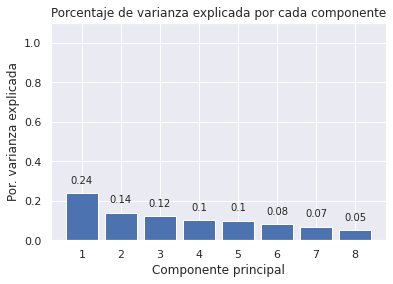

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(dat5.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');


PCA esencialmente crea tantos componentes principales como características hay en nuestros datos, y estan organizados en orden de importancia, es decir, cuanto de la varianza de PCA de nuestros datos se explica por cada componente.

En la tabla de porcentaje de varianza explicativa, podemos observar la importancia de cada feature de nuestro dataset. La primera componente representa la variabilidad de los datos del 24 %, la segunda componente repesenta un porcentaje del 14% y la tercera componente del 12%.

* *Las 3 primeras componentes podrian explicar en su totalidad la varianza explicativa, sin embargo hay que tener en cuenta otro factor, la perdida de informacion.*


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.23846431 0.37825868 0.49980996 0.60166205 0.69946724 0.77980172
 0.8480493  0.89889707]


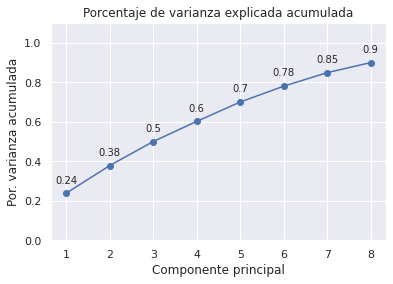

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(xt.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(xt.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Esta grafica no solo es importante, sino que en realidad es bastante util. Nos ayuda a decidir cuantos componentes mantener en nuestra reducción de dimensionalidad. Si elegimos 2 componentes, podemos ver que conservamos alrededor del 38% de la información. Si elegimos 6 componentes – alrededor del 80%. Con 8 de ellos, mantendremos casi el 90% de la variabilidad inicial.

## ***X-y Train X-y Test***

In [ ]:
y = dat5['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xt, y, test_size=0.30, random_state=42)

## ***Ramdom Forest(PCA)***

In [ ]:
rf5 = RandomForestRegressor()

In [ ]:
# grilla 

param_dist = {'n_estimators': np.arange(80,100),
              'max_depth': np.arange(5,8),
              'criterion': ['mse','mae'],
             }


In [ ]:
model5 = RandomizedSearchCV(rf5, param_dist,n_iter=5, random_state=42, cv=5)


model_fit5 = model5.fit(X_train, y_train)

In [ ]:
print("Mejores parametros: "+str(model5.best_params_))
print("Mejor Score: "+str(model5.best_score_)+'\n')

scores = pd.DataFrame(model5.cv_results_)
scores

Mejores parametros: {'n_estimators': 95, 'max_depth': 7, 'criterion': 'mse'}
Mejor Score: 0.5682396007956895



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,32.154705,0.296900,0.098414,0.000520,84,7,mse,"{'n_estimators': 84, 'max_depth': 7, 'criterio...",0.541883,0.555646,0.588740,0.593969,0.544862,0.565020,0.022046,3
1,33.168061,0.207735,0.101764,0.000456,87,7,mse,"{'n_estimators': 87, 'max_depth': 7, 'criterio...",0.542373,0.559757,0.595905,0.590880,0.550380,0.567859,0.021620,2
2,24.561596,0.130037,0.073875,0.000652,84,5,mse,"{'n_estimators': 84, 'max_depth': 5, 'criterio...",0.462647,0.459282,0.483023,0.485637,0.460994,0.470317,0.011521,5
3,36.199104,0.120536,0.112103,0.001368,95,7,mse,"{'n_estimators': 95, 'max_depth': 7, 'criterio...",0.547423,0.559959,0.594607,0.593915,0.545294,0.568240,0.021831,1
4,29.047385,0.172985,0.088103,0.001338,86,6,mse,"{'n_estimators': 86, 'max_depth': 6, 'criterio...",0.500011,0.512114,0.541780,0.542932,0.508128,0.520993,0.017877,4


In [ ]:
prediction = model_fit5.predict(X_test)

In [ ]:
r2 = r2_score(y_test, prediction)
r2

0.4039952820178143

El modelo de radom forest en este caso no mejora en comparacion con otros algoritmos donde no usamos pca. El r2 score para el testeo es de r2 = 0.40399

--------------------------------------------------------------------------------

Entrenamos el modelo nuevamente para determinar las variables mas importantes para random forest.

In [ ]:
rf5 = RandomForestRegressor(n_estimators= 95, max_depth= 7, criterion= 'mse')
RF5 = rf5.fit(X_train, y_train)

In [ ]:
RF5.feature_importances_

array([0.22734857, 0.09767334, 0.06056925, 0.15773253, 0.00990293,
       0.03325441, 0.3792436 , 0.03427538])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

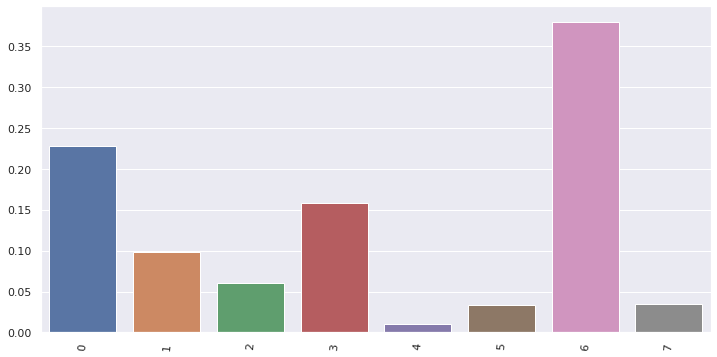

In [ ]:
importances = RF5.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (12,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=85)
plt.show

Las componentes principales mas importantes son la 6,0,3,2.

In [ ]:
predic = RF5.predict(X_test)

In [ ]:
r5  = r2_score(y_test, predic)
r5

0.4063490840596572

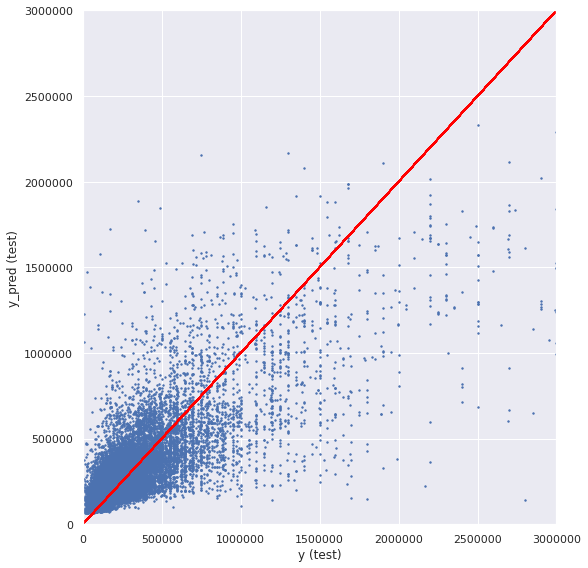

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.subplot(1,2,2)
ax.scatter(y_test,predic, s =2)
    

    
ax.plot(y_test, y_test, color = 'red')
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0,3000000)
plt.ylim(0,3000000)
    

    
plt.tight_layout()
plt.show()

La grafica de y_predicho vs y_test para el modelo de random forest con pca, no favorece a la hora de predecir la variable precio. Es notorio como la distribucion desde el comienzo es muy grande, lo cual significa que no va a predecir muy bien el precio de las propiedades en ningun momento. Si bien tiene una tendencia creciente, no es suficiente para considerarse como un buen predictor.

## ***Tecnica BaggingRegressor(PCA)***

El Bagging es una de las técnicas de construcción de conjuntos
que también se conoce como Agregación Bootstrap. Dada una muestra de datos, se extraen varias muestras, bootstrapped. Esta seleccion se realiza de manera aleatoria. Una vez que forman las muestras bootstrapped, se entrenan los modelos de manera separada. En general, estos modelos seran modelos con mucha varianza. La predicción de salida final se combina en las proyecciones de todos los submodelos. 

En este caso vamos a usar el modelo Tree regressor.

In [ ]:
ada_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=18)
                             ,n_estimators=150
                            )
# Entrenamos el modelo
ada_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=18,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tru

In [ ]:
y_train_pred = ada_reg.predict(X_train)
y_test_pred = ada_reg.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))


0.9499829240546132
0.5121325474714367


En este caso sobre entrenamos el modelo, ya que usamos una profundidad de 18 y unicamente tenemos 8 compornentes principales. 
El r2 score para el entrenamiento es de 0.9499
El r2 score para testeo es de 0.51213

--------------------------------------------------------------------------------

***Vamos a optimizar los hiperparametros***

***Random search***

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": np.arange(80,200,30),
              "base_estimator__splitter" :   ["best", "random"],
              
             }

dep = np.arange(5,18,4) 
for i in dep:
  DTR = DecisionTreeRegressor(max_depth = i , random_state=42)

  ABC = BaggingRegressor(base_estimator = DTR)

  # run grid search
  reg = GridSearchCV(ABC, param_grid,cv = 3,  scoring = 'r2')
  reg.fit(X_train,y_train)
  print('numero de profundidad:', i)
  print("Mejores parametros: "+str(reg.best_params_))
  print("Mejor Score: "+str(reg.best_score_))
  y_test_pred = reg.predict(X_test)
  print(r2_score(y_test, y_test_pred))

numero de profundidad: 5
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 110}
Mejor Score: 0.4740936074300102
0.3229248574358625
numero de profundidad: 9
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 110}
Mejor Score: 0.6273104135400206
0.45313274653555713
numero de profundidad: 13
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 170}
Mejor Score: 0.6780144158428226
0.4998354394779564
numero de profundidad: 17
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 140}
Mejor Score: 0.6935068566703597
0.5072201803326605


***Como este proceso dura 1 hora, dejo el resultado a continuacion :***

### numero de profundidad: 5

Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 110}

Mejor Score: 0.4740936074300102

r2(ytest - pred) = 0.3229248574358625

### =======================================================

### numero de profundidad: 9

Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 110}

Mejor Score: 0.6273104135400206

r2(ytest - pred) = 0.45313274653555713

### =======================================================

### numero de profundidad: 13
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 170}

Mejor Score: 0.6780144158428226

r2(ytest - pred) = 0.4998354394779564

### =======================================================

### numero de profundidad: 17
Mejores parametros: {'base_estimator__splitter': 'best', 'n_estimators': 140}

Mejor Score: 0.6935068566703597

r2(ytest - pred) = 0.5072201803326605

El mejor hiperparametro se logro con una profundidad de 17, y un r2 score en el entrenamiento de r2 = 0.6935.

r2 score en el testeo de r2 = 0.50722

-----------------------------------------------------------------------------

# ***Algoritmo 6***

Para este algoritmo vamos a usar clusterizacion. Usando reduccion de dimensionalidad para usar el algoritmo de clusterizacion K-means. Con el fin de determinar el numero de clases e identificar las agrupaciones distintas.

El análisis clúster es muy sensible a la presencia de objetos muy diferentes del resto (valores atípicos).

## ***Data 6***

In [ ]:
dat6 = independiente_variable.copy()

**realizamos filtro para latitud, quitando unicamente las filas**

In [ ]:
dat6 = dat6.drop(dat6.loc[dat6['lat'] > -33].index)
dat6 = remove_outliers(dat6, 'price')
dat6 = remove_outliers(dat6,'surface_total')
dat6 = remove_outliers(dat6, 'lat')
dat6 = remove_outliers(dat6, 'lon')
dat6 = remove_outliers(dat6, 'rooms')
dat6 = remove_outliers(dat6, 'bedrooms')
dat6 = remove_outliers(dat6, 'bathrooms')

## ***Standar Scaler 6***

In [ ]:
sc6 = StandardScaler()
sc6.fit(dat6)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x6 = sc6.transform(dat6)

## ***PCA***

In [ ]:
pca = PCA()
pca.fit(x6)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x6.shape

(78915, 13)

In [ ]:
pca.explained_variance_ratio_

array([3.43854527e-01, 1.58683163e-01, 8.99255792e-02, 8.83238873e-02,
       8.13041094e-02, 7.32092552e-02, 5.81681056e-02, 4.62401815e-02,
       3.13922679e-02, 1.66212819e-02, 7.20568506e-03, 5.07195727e-03,
       3.55722811e-33])

Text(0, 0.5, 'Variazan explicativa acumulada')

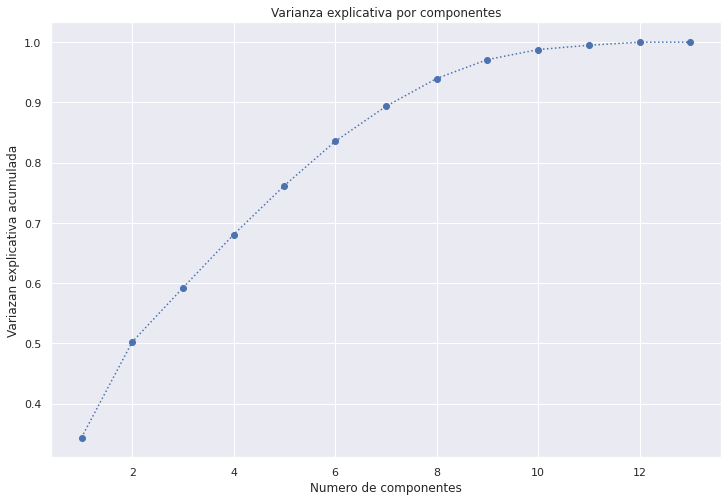

In [ ]:


plt.figure(figsize=(12,8))
plt.plot(range(1,14), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = ':') 
plt.title('Varianza explicativa por componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Variazan explicativa acumulada')

El grafico de varianza explicativa describe cuanto de porcentaje de datos se pierden en funcion del numero de componentes.

Por debajo de 0.9 de varianza NO es aceptable la perdida de información. Entonces, en este caso decidimos elegir 8 componentes.



In [ ]:
pca = PCA(n_components=8)
pca.fit(x6)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X6= pca.transform(x6)

## ***Metodo de codo K-MEANS***

El numero de clusters que elegimos para un conjunto de datos determinado no puede ser aleatorio. Cada cluster se forma calculando y comparando las distancias de los puntos de datos dentro de un cluster con su centroide. Una manera ideal de averiguar el número correcto de clusters sería calculando la suma de cuadrados (WCSS).

Basandonos en los valores del WCSS o el metodo del codo, podemos tomar una decicion sobre cuantos clusters nos interesaria mantener.

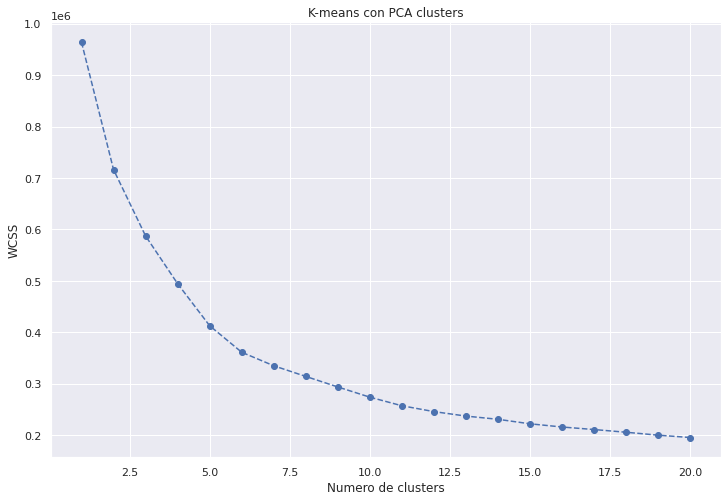

In [ ]:
wcss =  []

for i in range(1,21):
  kmeans_pca =  KMeans(n_clusters= i, init = 'k-means++', random_state=42)
  kmeans_pca.fit(X6)
  wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.title('K-means con PCA clusters')
plt.ylabel('WCSS')
plt.xlabel('Numero de clusters')
plt.show()

El grafico de WCSS evidencia que el codo se encuentra alrededor de 4-5 clusters. Por otro lado no es suficiente con este analisis, asi que para estar segurod utilizaremos el metodo de silueta, para corroborar los resultados.

--------------------------------------------------------------------------------

### ***Metodo de silueta K-MEANS***

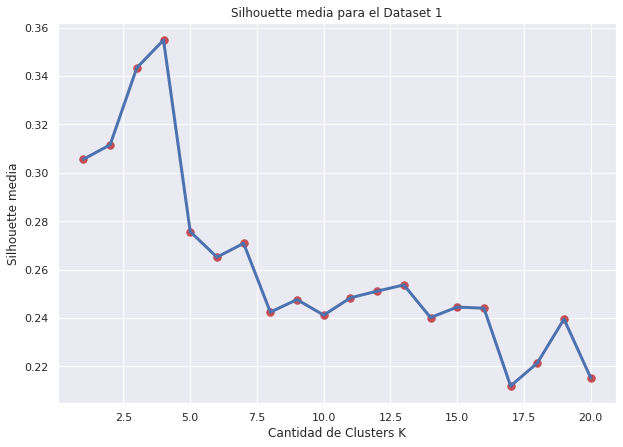

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,22):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X6)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X6, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 1')

plt.show()

El numero de clusters optimo de acuerdo al metodo de codo y de silueta, esta entre 3 y 4.

In [ ]:
 algoritmo =  KMeans(n_clusters= 4, init = 'k-means++',
                      max_iter= 300, n_init =10)

In [ ]:
algoritmo.fit(X6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

***Graficamos los clusters obtenidos que pertencen a las instancias***

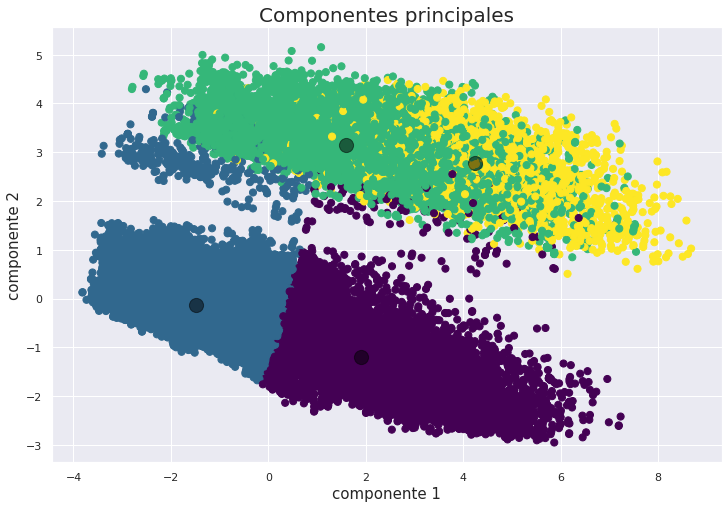

In [ ]:
plt.figure(figsize=(12,8))
y_kmeans = algoritmo.predict(X6)
plt.scatter(X6[:, 0], X6[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = algoritmo.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Componentes principales', fontsize = 20)
plt.xlabel('componente 1', fontsize = 15)
plt.ylabel('componente 2', fontsize = 15)
plt.show()

Una hipotesis sobre el resultado es que: 

Para este caso, de antemano podria haber dividido en 4 grupos, sin necesidad de hacer el metodo de codo, ya que dicha similitud podría estar basada en la ubicacion en la que se encuentran.
Por esta razon, la manera en como se distribuyen las clases, toman forma de las regiones de lo que se conoce como Gran buenos aires. 

Sin embargo, como la clusterzacion es sensible a outliers, y por esta razon filtramos por el rango intercuartilico, no tenemos el mapa completo.

## ***DBSCAN***

*Con fines de observacion, solo para determinar el comportamiento del algoritmo de clustering DBSCAN, probamos con una distancia eps = 1,8. No obstante nos adelantamos a los resultados, que no son buenos, debido a como se distribuyen los datos.Por otro lado, hay un número suficientemente grande de puntos dentro de la vecindad, y como resultado obtendremos clusters muy grandes.*

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

In [ ]:
db_1 = DBSCAN(eps=1.2, min_samples=5)

In [ ]:
db_1.fit(X6)

DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
# Consultamos las etiquetas
labels_1 = db_1.labels_

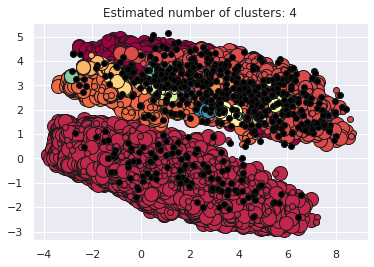

In [ ]:
plot_DBSCAN(X6, labels_1, db_1, n_clusters_1=4)

# ***CONCLUSIONES***

##Algoritmo 1: 

***Modelo: Regresión lineal***

* r2 score en Train: 0.5251925197104234
* r2 score en Test: 0.5208796613354096

***Modelo: Árbol de Decisión***

* r2 score en Train: 0.6859184646582172
* r2 score en Test: 0.6793588192810853

***Modelo: Vecinos más cercanos***

* r2 score en Train: 0.6577168778681883 
* r2 score en Test: 0.4967849929194087

#--------------------------------------------------------------------------------------------------

##Algoritmo 2:

***Random Forest***

* El valor de r2 para Train : 0.8016148534159285
* El valor de r2 para Test :  0.5666327199575265
* ***Las variables mas importantes para este modelo de Random Forest son: bathrooms, surface_covered, Departamento***

#--------------------------------------------------------------------------------------------------

##Algoritmo 3:


***Lineal regressor - validacion cruzada***

* El valor de r2 para Train : 0.59 (+/- 0.01)
* El valor de r2 para test : 0.601454280058557

***atributo polinomico utlizando regularizacion ridge:***


* El valor de r2 para Train : 0.6259261521418501
* El valor de r2 para test : 0.6396053545165712

#--------------------------------------------------------------------------------------------------

###Algoritmo 4 (Transformacion Gausseana): 

***Random Forest***

* El valor de r2 para Train : 0.5591322995572037
* El valor de r2 para test : 0.7353313864308728
* ***Las variables mas importantes para este modelo de Random Forest son: bathrooms, surface_covered, Departamento***

***Modelo con atributos polinomicos y regularizacion ridge***

* El valor de r2 para Train : -4448.955604054988'

#--------------------------------------------------------------------------------------------------

###Algoritmo 5

***Tecnica BOOSTING (DecisionTreeRegressor)***

* El valor de r2 para Train : 0.748068982378304
* El valor de r2 para test : 0.45406939754322073

***Tecnica BOOSTING (DecisionTreeRegressor-RandomSearch)***

* El valor de r2 para Train : 0.7068224086528527
* El valor de r2 para test : 0.512591528621813

***Ramdom Forest (PCA)***

* El valor de r2 para Train : 0.5682396007956895
* El valor de r2 para test : 0.4039952820178143

***Tecnica BaggingRegressor (PCA-DecisionTreeRegressor)***

* El valor de r2 para Train : 0.9499829240546132
* El valor de r2 para test : 0.5121325474714367

***Tecnica BaggingRegressor (PCA-DecisionTreeRegressor-GridSearch)***

* El valor de r2 para Train : 0.6935068566703597
* El valor de r2 para test : 0.5072201803326605




Despues de entrenar diferentes modelos avanzados se puede concluir lo siguiente:
1. En el primer algoritmo se logro optimizar los hiperparametros, a pesar de tener mas variables y mas filas en el entrenamiento, comparado con el modelo benchmark, fue uno de los mejor modelos que se obtuvieron en el proyecto. ***Arbol de decision*** con una confiabilidad (r2) en el testeo del 67%.

2. Con los hiperparametros utilizados en este proyecto, los modelos que se relacionan con ensembles, decaen en el score (r2) del testeo, debido al sobreajuste. Esto se podria mejorar, probando con mas numeros de arboles, mas o menos profundidad u otros hiperparametros que no se tuvieron en cuenta, debido a la limitacion computacional y el tiempo de procesamiento que tarda cada modelo.

3. Para Random Forest, en cualquier modelo que se entreno, coinciden con la misma importancia de las variables. Estas son :
  * Bathrooms
  * Surface_covered
  * Departamento

  Existe una fuerte relacion de la variable baño a la hora de predecir nuestro target. Pero a su vez esta variable esta relacionada con rooms, por lo que tendria sentido, sin embargo, creando una nueva variable predictora entre estos features, no aporta nada al modelo.
  
  Departamento en el EDA representa un gran porcentaje dentro de nuestros datos.

4. El segundo mejor modelo es regularizacion ridge con atributos polinomicos, con una confiabilidad del 63 % en el testeo. Usando un polinomio de grado 6, se encontro un hiperplano que se ajusta bien a nuestra variabilidad de los datos. La regularizacion ridge tuvo que ajustar bastantes pendientes para llegar a este resultado, con diferentes ordenes de magnitud para minimizar la complejidad del modelo y de la misma manera, minimizar la funcion de coste. La Ordenada que se obtuvo es: -1.0349866e+10.

5. En pca la varianza acumulada nos explica que perderemos mas del 90% de nuestros datos con componentes menores a 8. Ademas, las primeras 3 componentes principales representan la mayor variabilidad de los datos.

6. El algoritmo 4, pese que se obtuvo un r2 superior a los demas en el testeo (r2 = 0.735 - Random Forest), es peligro afirmar que cambiando la distribucion siempre se podra obtener un mejor resultado, ya que estariamos modificando el comportamiento que tienen. Esto tambien lo evidenciamos cuando entrenamos el modelo lineal (regularizacion ridge), donde las predicciones que hace son totalmente erroneas y expresan un mal modelo. Aun asi, se podria profundizar mas sobre el tema, analizando mucho mejor que tanto cambio nuestra distribucion de densidad.

7. Clusterizacion: Como no tenemos un problema donde no supervisado, se podria esperar que los datos tomen un label parecido a las provincias de cada uno. El resultado que se obtuvo es similar, lo que nos lleva a pensar que se hizo una buena clusterizacion (No perfecta obviamente).



*Quedaron muchas mas cosas por probar, diferetes modelos y muchos mas parametros que no se tuvieron en cuenta para este caso. No se tomaron en cuenta las columnas con texto, las cuales podrian llegar a ser importantes para algun modelo, o para entender que inmuebles se podrian vender o que se podria mejorar para incrementar las ventas, y llegar a clientes potenciales.* *No se implementaron series de tiempo, pero seria interesante probar con los features que se tienen, y hacer un analisis mas profundo*